### Welcome to the Southern Water Corp Python Case Study!

While working on the Statistics unit, you used Microsoft Excel's data analytics capabilities to analyze Southern Water Corp's Pump Data.

You might have realised that while Excel is powerful, it was a bit tricky to use for visualizations like Box Plots, multiple line plots and in general, there are challenges that arise when doing quick analysis.

In this Case Study, you're going to *revisit* the Pump Data, with a few different questions that help you see how you can use Python to speed up your analysis. You'll also witness how powerful Python's plotting and modelling libraries can be! 


**Please note that this case study is composed of two parts.** Once you have completed Part 1, which involves descriptive statistics, please submit your work and discuss it with your mentor before moving on to Part 2. 

<H3>  Time to get started! </H3>

---

## Part I: <span style="color:blue">Descriptive Statistics</span>

### Step 1: <span style="color:green">Import Libraries</span> 

Import the following libraries: 

**Matplotlib** - This is Python's basic plotting library.
You'll use the pyplot and dates function collections from matplotlib throughout this case study. We encourage you to important these two specific libraries with their own aliases. Also, include the line **'%matplotlib inline'** so that your graphs are easily included in your notebook. 

**Seaborn** - This library will enable you to create aesthetically pleasing plots.

**Pandas** - This library will enable you to view and manipulate your data in a tabular format.

**statsmodels.api** - This library will enable you to create statistical models. You will need this library when performing regession analysis in Part 2 of this case study.

Please note we've included the mpl.rcParams['figure'figsize'] code for you.

This code controls how big your charts will be with the syntax of (X,Y) where X represents the X Axis and Y, the Y Axis.

## Place your code here

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

---------------------------------------------------------------------------


### Step 2: <span style="color:green">Descriptive Statistics</span> 
The data you've received from Southern Water Corp has been split into two files.
The first file, titled DF_Raw_Data contains all the 'raw' Pump Data you will need for your analysis.
The second file, titled DF_Rolling_Stdev contains the Rolling Standard Deviation Data you will need for Question 10 onwards.

We have **deliberately** set up the data in this manner so please ensure that when you need to perform the rolling standard deviation calculations, you use the **DF_Rolling_Stdev.csv** file.

<b> Please complete the following below: </b>

i. Import each of the two data sources and store them into their individual DataFrames. 

We suggest you use the names : **dataframe_raw & dataframe_stdev respectively.**. 

ii. Print descriptive statistics for each of the DataFrames using **.describe()** and **.info()**

In [2]:
dataframe_raw = pd.read_csv('P1_DF_Raw_Data.csv')
dataframe_stdev = pd.read_csv('P1_DF_Rolling_Stdev.csv')

In [7]:
dataframe_raw.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000
mean,41.802629,41.796702,90.796576,202.851610,50.226661,3.540897,76.015149,0.021199
std,3.656576,3.654873,10.217885,22.683977,5.298203,0.579055,6.651633,0.144075
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.050000,41.000000,85.000000,191.000000,48.000000,3.220000,74.560000,0.000000
50%,42.100000,42.140000,91.000000,203.000000,51.000000,3.480000,76.620000,0.000000
75%,43.140000,43.130000,97.000000,215.000000,53.000000,3.780000,78.470000,0.000000
max,45.900000,45.840000,124.000000,264.000000,65.000000,7.560000,83.450000,1.000000


In [4]:
dataframe_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2453 entries, 0 to 2452
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data Source              2453 non-null   object 
 1   TIMEFRAME (DD/MM/YYYY)   2453 non-null   object 
 2   Volumetric Flow Meter 1  2453 non-null   float64
 3   Volumetric Flow Meter 2  2453 non-null   float64
 4   Pump Speed (RPM)         2453 non-null   int64  
 5   Pump Torque              2453 non-null   int64  
 6   Ambient Temperature      2453 non-null   int64  
 7   Horse Power              2453 non-null   float64
 8   Pump Efficiency          2453 non-null   float64
 9   PUMP FAILURE (1 or 0)    2453 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 191.8+ KB


In [8]:
dataframe_stdev.describe()

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
count,2452.000000,2452.000000,2452.000000,2452.000000,2452.000000,2452.00000,2452.000000,2452.000000
mean,1.485126,1.497361,6.648308,13.945338,3.436370,0.37060,2.725232,0.021207
std,2.294950,2.282053,5.722897,12.394302,3.043042,0.29979,4.186723,0.144104
min,0.380000,0.640000,0.580000,5.000000,0.900000,0.11000,1.170000,0.000000
25%,1.070000,1.080000,5.520000,11.210000,2.920000,0.28000,1.960000,0.000000
50%,1.160000,1.170000,5.990000,12.180000,3.160000,0.32000,2.120000,0.000000
75%,1.230000,1.260000,6.460000,13.110000,3.370000,0.36000,2.270000,0.000000
max,21.390000,21.530000,59.310000,124.710000,30.650000,3.32000,39.150000,1.000000


<b> When looking at the Descriptive Statistics for both datasets; pay attention specifically to the standard deviation and mean. 
What do you observe when you compare the dataframe_raw standard deviation and mean, versus the dataframe_stdev standard deviation and mean?
    
Place your answer below. </b>

# Answer
* Mean values are larger in the raw data. Std values are larger in the raw data, with the exception of PUMP FAILURE value which is almost identical in both data sets. 

---------------------------------------------------------------------------

### Step 3: <span style="color:green">Create a Boxplot</span> 

When you look at your dataframe, you should be able to see the upper and lower quartiles for each row of data from when you used **.describe**.

This gives you an understanding of the number of entires in each dataset (~2,452). 

However, just as you learned when using Excel, creating a visualization of the data using Python is often more informative than viewing the table statistics. With that in mind, convert the DataFrames into a boxplot by following these instructions:

<H3> <span style="color:green"> Please repeat these steps for both the dataframe_raw dataset and the dataframe_stdev dataset </span></H3> 

i) Using the DataFrame, create a boxplot visualising this data.

ii) Using the DataFrame, create a lineplot visualising this data.

An example of the syntax to consider would be:

    dataframe.plot(kind='box')
    plt.show()

Hint: You might want to reference the following .plot function <a href = https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html> here </a> 


### Please put your code here


#### We've included an example of what your Box Plot and Line Plot *should* look like once you've plotted this using the dataframe_raw and dataframe_stdev datasets.

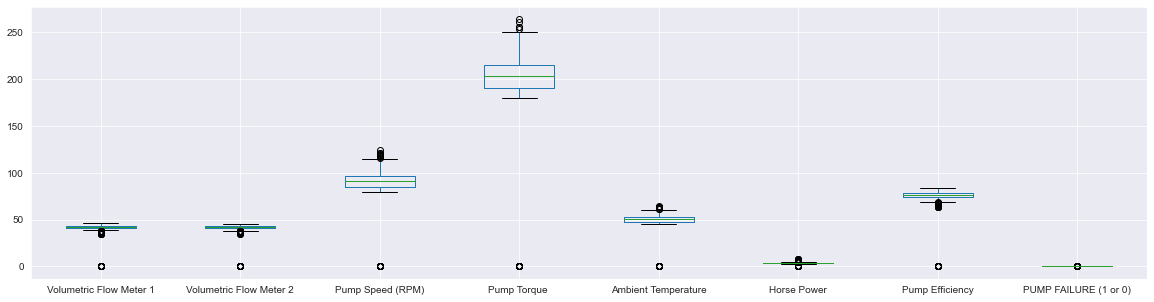

In [9]:
dataframe_raw.plot(kind='box')
plt.show()

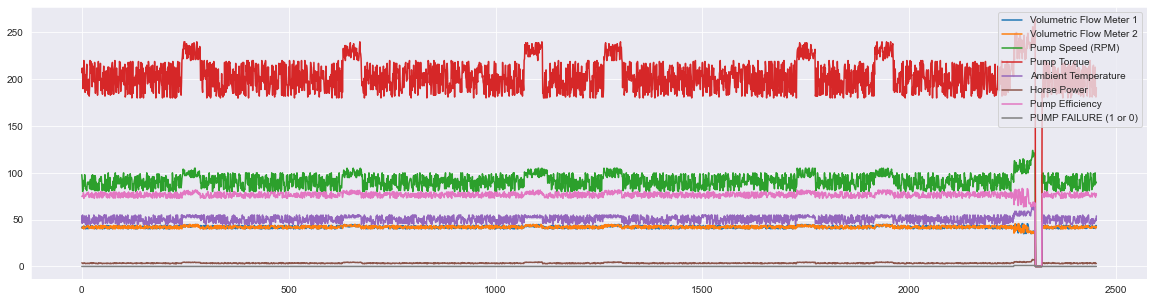

In [10]:
dataframe_raw.plot(kind='line')
plt.show()

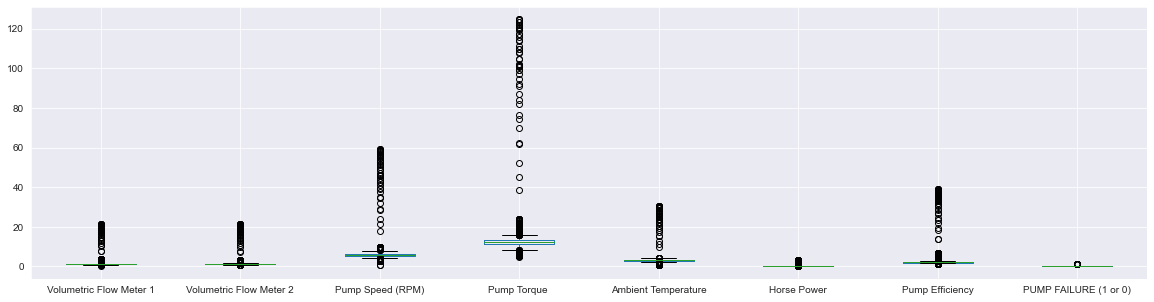

In [11]:
dataframe_stdev.plot(kind='box')
plt.show()

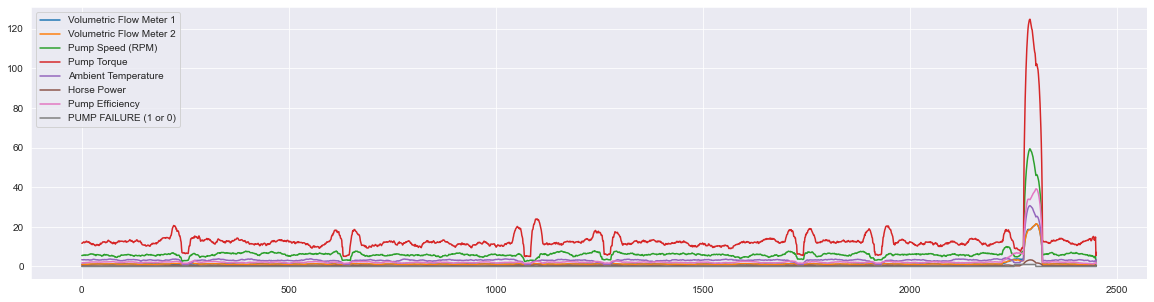

In [12]:
dataframe_stdev.plot(kind='line')
plt.show()

**What have you observed from the boxplot and line plots for both the dataframe_raw and dataframe_stdev datasets?**

# Answer
* Dataframe Raw Box Plot: outliers are not substantial, however some noticeable in pump speed and pump torque.
* Dataframe Raw Line Plot: when observing line trends , the trends are very similar across the raw and stdev data set , with a significant spike across most data points at approximately 2350 along the X axis. 
* Dataframe Std Box Plot: there are a significant number of outliers across this data set. Pump speed, pump torque, and pump efficacy hold a noticeable number of outliers in the data set. The IQR of the values is noticeably smaller (tighter) in the standard deviation data. 
* Dataframe Std Line Plot: when observing line trends , the trends are very similar across the raw and stdev data set , with a significant spike across most data points at approximately 2350 along the X axis.


---------------------------------------------------------------------------

---------------------------------------------------------------------------

### Step 4: <span style="color:green">Filtered DataFrames with Box Plots</span> 

You would have noted the datasets we have contain a Pump Failure (1 or 0) Variable that indicate whether the pump is failing (1) or whether the pump is behaving normally (0).  
    
It is very likely you will see differences in the overall populations of Pre-Failure vs. Post Failure.
To visualise this difference, you should separate your datasets, filtering for when the Pump Failure = 0 or when the Pump Failure = 1, and see what trends emerge. 
    
This will require you to <b> SUBSET </b> your dataframe using *boolean filters*.

We've included an example below to show-case how this syntax works:

    condition_1 = dataframe['SomeColumn']== 1
    dataframe_0 = dataframe[condition_1] 
    dataframe.plot(kind='box')
    plt.title("Example Plot")
    plt.show()
    

<H3> <span style="color:green"> Please repeat these steps for both the dataframe_raw dataset and the dataframe_stdev dataset </span></H3> 

i) Using the dataframe_raw dataset, create two boxplots specifically for when the pump has failed and when the pump is working normally. 

As part of best practice, don't forget to clearly title your box plots so we can identify which plot is for the failure and which plot is for the normal operations.

To do this, you'll have to recall how to apply **boolean** filtering to a dataframe. If you're not sure how to do this, re-read the hints we've given above and pay careful attention to the syntax we've shown.



## Please put your code here

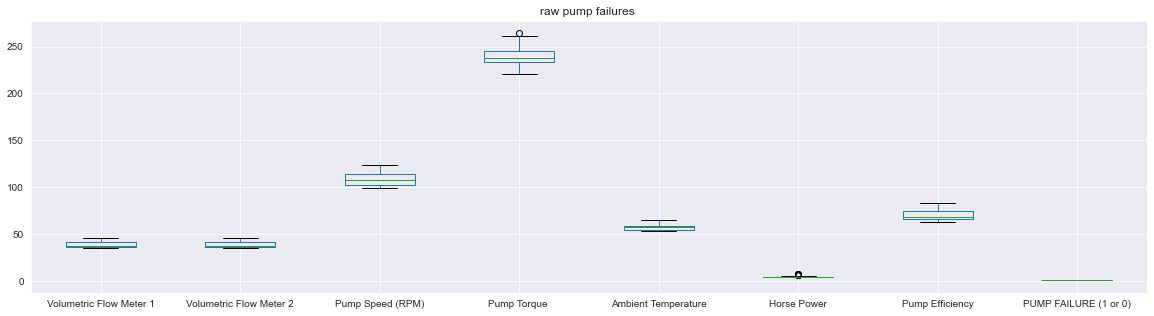

In [15]:
#raw pump failures 
is_failing = dataframe_raw['PUMP FAILURE (1 or 0)']== 1
df_raw_fails = dataframe_raw[is_failing] 
df_raw_fails.plot(kind='box')
plt.title("raw pump failures ")
plt.show()

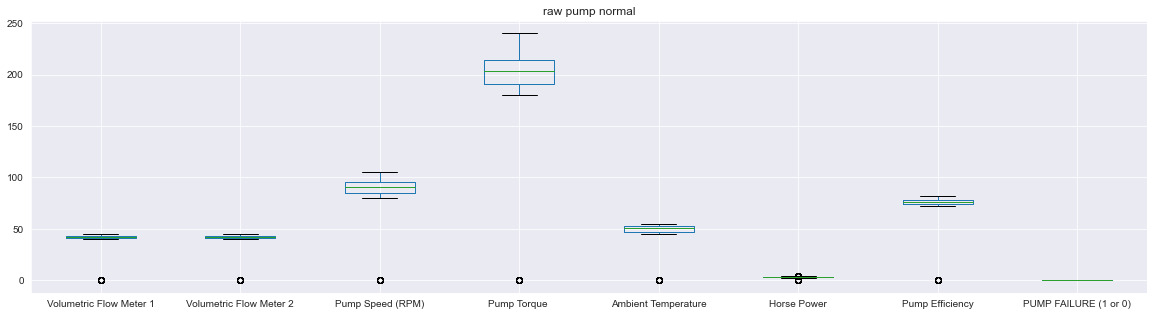

In [16]:
#raw pump normal
is_normal = dataframe_raw['PUMP FAILURE (1 or 0)']== 0
df_raw_normals = dataframe_raw[is_normal] 
df_raw_normals.plot(kind='box')
plt.title("raw pump normal")
plt.show()

# Answer
* Observations: Raw pump failures vs raw pump normal
* Pump Speed and Pump Torque are higher during the failure. 


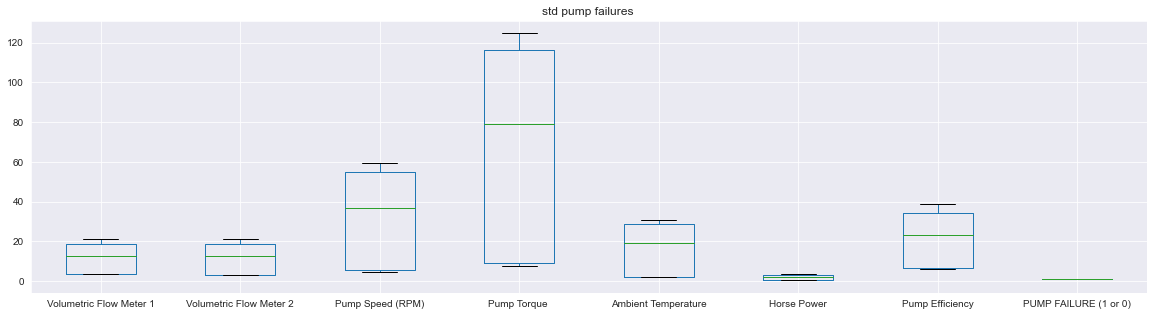

In [19]:
#std pump failures 
is_failing = dataframe_stdev['PUMP FAILURE (1 or 0)']== 1
df_std_fails = dataframe_stdev[is_failing] 
df_std_fails.plot(kind='box')
plt.title("std pump failures ")
plt.show()

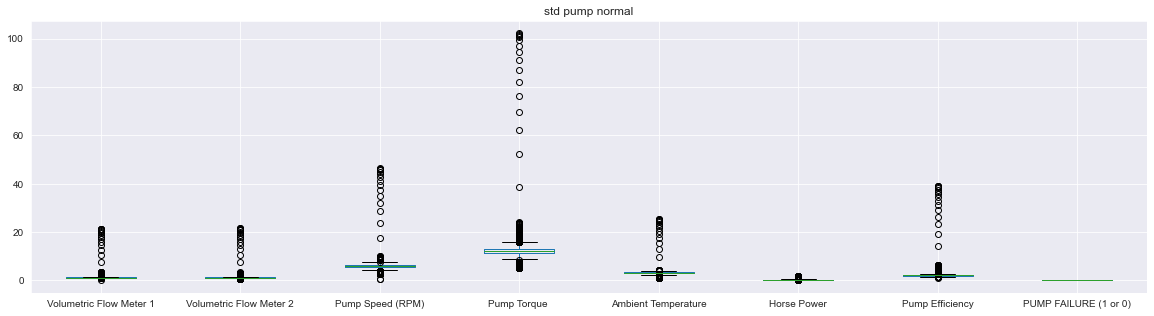

In [20]:
#std pump normal
is_normal = dataframe_stdev['PUMP FAILURE (1 or 0)']== 0
df_std_normals = dataframe_stdev[is_normal] 
df_std_normals.plot(kind='box')
plt.title("std pump normal")
plt.show()

<h3> What have you noticed when you compared the dataset in this manner? </h3>

# Answer
* Observations: Std pump failures vs Std pump normal
* The IQR’s are significantly large and pronounced across the std pump failures data, especially in pump torque and pump speed. 
* The IQR’s are significantly small across the std pump normal data, however there are a significant number of outliers across all categories of the std pump normal data except for Horse Power. 


---------------------------------------------------------------------------

A quick analysis might show-case there are many *outliers* that exist in your dataset.

As you all know, outliers can easily *skew* your analysis. You might want to remove them.

The general logic for removing an outliers is:

<b> Any Value that is either Q1 - 1.5x IQR or greater than Q3 + 1.5x IQR is considered an outlier. </b>

Where Q1 = Quartile 1 and Q3 = Quartile 3

Let's break these down to a few simple steps and tackle how to calculate this.

1. Define the Quartiles Q1 and Q3. 
2. Calculate the Interquartile Range (Q3 - Q1)
3. Create two new variables; Lower_Range (Q1 - 1.5x IQR) and Upper_Range ( Q3 + 1.5x IQR).
4. Using Boolean Subsetting, filter the DataFrame for outliers and remove them.
5. Calculate what the proportion of outliers exist (i.e. Number of entries left after outlier removal / Number of total entries in dataset). 


### Step 5: <span style="color:green">Create Quartiles</span> 

Create two new variables called Q1 and Q3 using the dataframe_raw dataset. 

i)  <b> Q1 should contain the 25th percentile for all columns in the DataFrame. Q3 should contain the 75th percentile  for all the columns in the DataFrame.</b>

You may want to use the .quantile() function explained <a href = https://www.geeksforgeeks.org/python-pandas-dataframe-quantile/> here. </a> 

ii) After defining Q1 and Q3, calculate the interquartile range **(IQR = Q3 - Q1)** for all columns in the DataFrame and print it to the screen.

We've included a sample of the IQR output below for your reference!

## Please put your code here

In [30]:
#DO NOT ALTER THIS LINE. BELOW IQR OUTPUT FOR SANITY CHECK

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64

In [21]:
Q1 = dataframe_raw.quantile(0.25, axis=0)

In [22]:
Q1

Volumetric Flow Meter 1     41.05
Volumetric Flow Meter 2     41.00
Pump Speed (RPM)            85.00
Pump Torque                191.00
Ambient Temperature         48.00
Horse Power                  3.22
Pump Efficiency             74.56
PUMP FAILURE (1 or 0)        0.00
Name: 0.25, dtype: float64

In [23]:
Q3 = dataframe_raw.quantile(0.75, axis=0)

In [24]:
Q3

Volumetric Flow Meter 1     43.14
Volumetric Flow Meter 2     43.13
Pump Speed (RPM)            97.00
Pump Torque                215.00
Ambient Temperature         53.00
Horse Power                  3.78
Pump Efficiency             78.47
PUMP FAILURE (1 or 0)        0.00
Name: 0.75, dtype: float64

In [25]:
IQR = Q3 - Q1

In [26]:
#passes sanity check 
IQR

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64

---------------------------------------------------------------------------

In [ ]:
# SANITY CHECK ABOVE REACHED FOR STEP 5, CLEAR

### Step 6: <span style="color:green">Identify Outliers</span> 

Continuing in from Step 5 - we still need to calculate how we can remove our outliers.

We're aware of the overall formula as shown per below.

<b> Outlier = Q1 - 1.5x IQR OR Q3 + 1.5x IQR </b>

Now work out how to identify these outliers step by step. 

<b> i) Define two new variables, Lower_Limit and Upper_Limit can be calculated as:</b>
<p>
<li> Lower_Limit = Q1 - 1.5 * IQR </li>
<li> Upper_Limit = Q3 + 1.5 * IQR </li> 
   
<b> ii) Using Lower_Limit and Upper_Limit with an OR (|) condition, filter the DataFrame to include *only* the outliers. How many outliers do we have?</b>
    
The syntax should look like this:
    
    Outliers = some_dataframe [ ((some_dataframe < Lower_Limit) | ((dataframe_raw > Upper_Limit))).any(axis=1) ]
    
The .any(axis=1) indicates that for *any* entry in the columns that matches the criteria of being *less* than the lower limit or *greater* than the upper limit, for that column (axis=1), that row will be removed. 

If you're stuck, <a href = https://stackoverflow.com/questions/54398554/how-to-remove-outliers-in-python> here's </a> a link that will show you how you can remove outliers in Python! 

<b> iii) What is the percentage of data that remains after we've removed the outliers from the dataframe_raw dataset?</b>
    

## Please put your code here

In [28]:
Lower_Limit = Q1 - 1.5 * IQR
Upper_Limit = Q3 + 1.5 * IQR

In [29]:
# ignore the statement "that row will be removed." above as it is confusing
#at least one of the columns is an outlier, so that entire row itself is classified as an outlier
# the outlier does not have to be pump1/0

#all 1 (pump failure) has to be outliers...
#but not all outliers has to be 1 (pump failure), only 52 are 1(pump failure).....as seen below
# the remaining 43 outliers (bc 95-52=43) contain outliers in a column 'other than' pump failure

Outliers = dataframe_raw [ ((dataframe_raw < Lower_Limit) | ((dataframe_raw > Upper_Limit))).any(axis=1) ]

<ipython-input-29-fc03a8eb9cad>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Outliers = dataframe_raw [ ((dataframe_raw < Lower_Limit) | ((dataframe_raw > Upper_Limit))).any(axis=1) ]
<ipython-input-29-fc03a8eb9cad>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Outliers = dataframe_raw [ ((dataframe_raw < Lower_Limit) | ((dataframe_raw > Upper_Limit))).any(axis=1) ]


In [61]:
len(Outliers)

95

In [ ]:
#at least one of the columns contains an outlier
# the outlier does not have to be pump1/0

In [60]:
Outliers

,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
248,Raw,9/12/2014 4:08,44.61,42.28,103,240,54,4.71,81.11,0
267,Raw,9/12/2014 4:27,43.02,44.53,102,238,53,4.62,78.22,0
272,Raw,9/12/2014 4:32,43.37,42.30,104,238,52,4.71,78.85,0
641,Raw,9/12/2014 10:41,42.50,43.12,105,234,52,4.68,77.27,0
655,Raw,9/12/2014 10:55,42.90,43.26,104,236,53,4.67,78.00,0
...,...,...,...,...,...,...,...,...,...,...
2316,Raw,10/12/2014 14:36,0.00,0.00,0,0,0,0.00,0.00,0
2317,Raw,10/12/2014 14:37,0.00,0.00,0,0,0,0.00,0.00,0
2318,Raw,10/12/2014 14:38,0.00,0.00,0,0,0,0.00,0.00,0
2319,Raw,10/12/2014 14:39,0.00,0.00,0,0,0,0.00,0.00,0


In [64]:
#all 1 has to be outliers
#but not all outliers has to be 1, only 52 are 1(pump failure).....as seen
Outliers[Outliers['PUMP FAILURE (1 or 0)']==1].count()

Data Source                52
TIMEFRAME (DD/MM/YYYY)     52
Volumetric Flow Meter 1    52
Volumetric Flow Meter 2    52
Pump Speed (RPM)           52
Pump Torque                52
Ambient Temperature        52
Horse Power                52
Pump Efficiency            52
PUMP FAILURE (1 or 0)      52
dtype: int64

In [32]:
#all 1 has to be outliers
#but not all outliers has to be 1, only 52 are 1(pump failure).....as seen above
dataframe_raw

,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
0,Raw,9/12/2014 0:00,41.30,41.16,98,207,54,3.86,74.84,0
1,Raw,9/12/2014 0:01,42.40,41.39,92,212,46,3.71,75.25,0
2,Raw,9/12/2014 0:02,41.43,41.15,80,207,55,3.15,74.82,0
3,Raw,9/12/2014 0:03,42.21,40.93,83,190,49,3.00,74.42,0
4,Raw,9/12/2014 0:04,40.51,43.32,90,195,50,3.34,78.76,0
...,...,...,...,...,...,...,...,...,...,...
2448,Raw,10/12/2014 16:48,40.75,41.61,87,183,48,3.03,75.65,0
2449,Raw,10/12/2014 16:49,41.32,42.34,100,213,48,4.06,76.98,0
2450,Raw,10/12/2014 16:50,40.53,40.68,89,182,51,3.08,73.96,0
2451,Raw,10/12/2014 16:51,43.82,42.87,89,181,49,3.07,77.95,0


In [33]:
len(Outliers)

95

In [34]:
len(dataframe_raw)

2453

In [35]:
Outliers.count()

Data Source                95
TIMEFRAME (DD/MM/YYYY)     95
Volumetric Flow Meter 1    95
Volumetric Flow Meter 2    95
Pump Speed (RPM)           95
Pump Torque                95
Ambient Temperature        95
Horse Power                95
Pump Efficiency            95
PUMP FAILURE (1 or 0)      95
dtype: int64

In [36]:
dataframe_raw.count()

Data Source                2453
TIMEFRAME (DD/MM/YYYY)     2453
Volumetric Flow Meter 1    2453
Volumetric Flow Meter 2    2453
Pump Speed (RPM)           2453
Pump Torque                2453
Ambient Temperature        2453
Horse Power                2453
Pump Efficiency            2453
PUMP FAILURE (1 or 0)      2453
dtype: int64

In [ ]:
# there are 95 Outlier rows out of the 2453 total rows
# meaning some column in that row contained an Outlier (52 are in the pump=1 failure category)

# 95/2453 = 3.87%
# Outliers represent 3.87% of the data itself 

# Answer
* 95/2453 = **3.87%**
* Outliers represent **3.87%** of the data itself 

<b> You've removed the outliers and still have a significant amount of data left. Do you think removing outliers is problematic or not? Dtate your answer below and explain your thoughts. </b> 


In [ ]:
# the below notes express a frustation process in discovering what is happening with .any(axis=1)

In [ ]:
#getting the IQR is easy, however BOTH getting the outliers and removing the outliers is problematic. 
#there seem to be evlolving methods to do this
#the data at present time seems to need to be divided into two parts 
# 1 : numeric
# 2 : categorical
# and then concatenated back together for the result

# there is some ambiquity surrounding the .any(axis=1) use
##while this works effectivley (returning 95 outliers) by defition did it 'drop' the outliers?? or 
##or did it 'drop' them into the 95 data itslef? this is not straightforward from a general observation, thus problematic 

####.any(axis=1) says check all columns which is 1, captures them
##

###all 1 has to be outliers
###but not all outliers has to be 1, only 52 are 1(pump failure).....

---------------------------------------------------------------------------

In the previous exercise, we've showed you how to calculate outliers. Now you want to remove *all* the outliers in your dataset and create box plots to see how the data looks without outliers.  

We've defined our outliers DataFrame as per below:

    Outliers = some_dataframe [ ((some_dataframe < Lower_Limit) | ((dataframe_raw > Upper_Limit))).any(axis=1) ]

<b> We're now going to add one symbol that will help you return a dataframe with 0 Outliers.

This is the ~ Symbol. </b>

Essentially this Symbol tells Python to 'invert' the current boolean Value from True, to False.

An example use of this syntax would be:
    
    some_dataframe = some_dataframe[ ~ ( (some_condition) ) ]


### Step 7: <span style="color:green">Create a box plot without outliers</span> 

i) Create a new DataFrame called no_outliers and using the ~ operator, remove all the outliers from the DataFrame <p>
ii) Using the no_outliers dataframe, create two box plots as per below: <p>
    <li> A boxplot when PUMP FAILURE is 1 (Failure) </li>
    <li> A boxplot when PUMP FAILURE is 0 (Normal Behaviour) </li> 

<b> Did any of your plots reveal nothing to plot? If yes, why might that be...? Think very carefully regarding what you have performed. </b>


## Please put your code here

In [41]:
no_outliers = dataframe_raw [ ~((dataframe_raw < Lower_Limit) | ((dataframe_raw > Upper_Limit))).any(axis=1) ]

<ipython-input-41-e82883329e94>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  no_outliers = dataframe_raw [ ~((dataframe_raw < Lower_Limit) | ((dataframe_raw > Upper_Limit))).any(axis=1) ]
<ipython-input-41-e82883329e94>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  no_outliers = dataframe_raw [ ~((dataframe_raw < Lower_Limit) | ((dataframe_raw > Upper_Limit))).any(axis=1) ]


In [42]:
no_outliers

,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
0,Raw,9/12/2014 0:00,41.30,41.16,98,207,54,3.86,74.84,0
1,Raw,9/12/2014 0:01,42.40,41.39,92,212,46,3.71,75.25,0
2,Raw,9/12/2014 0:02,41.43,41.15,80,207,55,3.15,74.82,0
3,Raw,9/12/2014 0:03,42.21,40.93,83,190,49,3.00,74.42,0
4,Raw,9/12/2014 0:04,40.51,43.32,90,195,50,3.34,78.76,0
...,...,...,...,...,...,...,...,...,...,...
2448,Raw,10/12/2014 16:48,40.75,41.61,87,183,48,3.03,75.65,0
2449,Raw,10/12/2014 16:49,41.32,42.34,100,213,48,4.06,76.98,0
2450,Raw,10/12/2014 16:50,40.53,40.68,89,182,51,3.08,73.96,0
2451,Raw,10/12/2014 16:51,43.82,42.87,89,181,49,3.07,77.95,0


In [44]:
no_outliers_1_failure_condition = no_outliers['PUMP FAILURE (1 or 0)']==1

In [45]:
no_outliers_1_failure = no_outliers[no_outliers_1_failure_condition]

In [46]:
# when pump failure = 1, these are the records that are outliers
no_outliers_1_failure

,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)


In [47]:
no_outliers_1_failure.count()

Data Source                0
TIMEFRAME (DD/MM/YYYY)     0
Volumetric Flow Meter 1    0
Volumetric Flow Meter 2    0
Pump Speed (RPM)           0
Pump Torque                0
Ambient Temperature        0
Horse Power                0
Pump Efficiency            0
PUMP FAILURE (1 or 0)      0
dtype: int64

In [48]:
len(no_outliers_1_failure)

0

# Answer

* when 1, or pump failure is a condition, and we cleaned the data of outliers, there is nothing returned

* this seems to suggest that when we cleaned the data of outliers, we also cleaned ALL 1 conditions, or pump failures

* If this is true, then our Outliers are Pump Failures

* all 1(Pump Failure) ARE outliers..
* but not all outliers has to be 1(Pump Failure), only 52 are 1(pump failure). the remaining 43 (95-52=43) are categorized as outliers bc some other column contained an outlier.

In [49]:
no_outliers_0_normal_condition = no_outliers['PUMP FAILURE (1 or 0)']==0
no_outliers_1_normal = no_outliers[no_outliers_0_normal_condition]
no_outliers_1_normal

,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
0,Raw,9/12/2014 0:00,41.30,41.16,98,207,54,3.86,74.84,0
1,Raw,9/12/2014 0:01,42.40,41.39,92,212,46,3.71,75.25,0
2,Raw,9/12/2014 0:02,41.43,41.15,80,207,55,3.15,74.82,0
3,Raw,9/12/2014 0:03,42.21,40.93,83,190,49,3.00,74.42,0
4,Raw,9/12/2014 0:04,40.51,43.32,90,195,50,3.34,78.76,0
...,...,...,...,...,...,...,...,...,...,...
2448,Raw,10/12/2014 16:48,40.75,41.61,87,183,48,3.03,75.65,0
2449,Raw,10/12/2014 16:49,41.32,42.34,100,213,48,4.06,76.98,0
2450,Raw,10/12/2014 16:50,40.53,40.68,89,182,51,3.08,73.96,0
2451,Raw,10/12/2014 16:51,43.82,42.87,89,181,49,3.07,77.95,0


In [ ]:
#all columns are 0 (normal), the entire 2258

<AxesSubplot:>

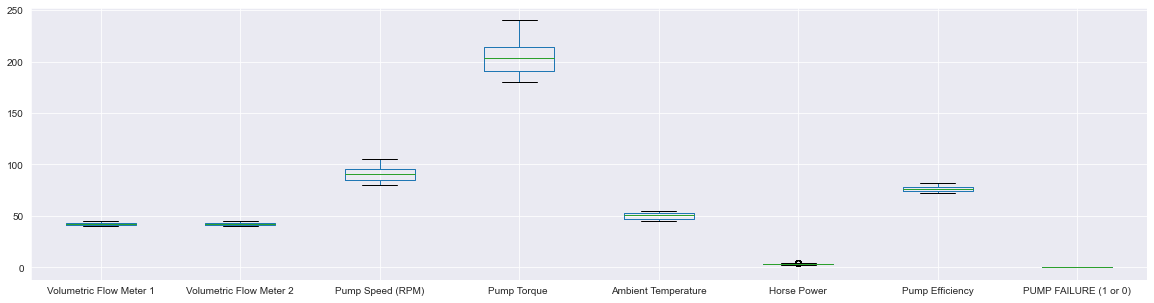

In [51]:
no_outliers_1_normal.plot(kind='box')

<h3> <span style="color:orange"> Please note that Step 8 and Step 9 are Challenge Questions and will intentionally be more difficult </h3> 

### Step 8: <span style="color:green">Plot and Examine Each Column</span> 

As you might recall from the earlier plot you had made with the line plot; it was hard to see which variables were the most significant with respect to pump failure when all the variables are plotted together. This is common when variables are at different scales, the trends can be more challenging to interpret. This is why we are going to ITERATE through the DataFrame, plot each individual variable out, and compare this with the Pump Failure for a more streamlined analysis.

This will require you to make use of the following syntax:

1. Define a list variable called ListOfVariables; this is to contain the column names of all the **numerical** variables you wish to iterate through in the dataframe_raw dataset <p>

2. Instantiate your for loop with the following syntax: 
       
    
    for item in ListOfVariables:
        first_axis = dataframe[___].plot #Looping through every item in the dataframe.
        second_axis = first_axis.twinx() #The Twinx function is used to ensure we share the X-Axis for both plots
        second_axis.plot(dataframe['ColumnOfInterest'], color='teal')
        plt.title(item)
        plt.show()
        
<b> i) Using the syntax provided, loop through the dataframe_raw dataset, plotting every variable individually, against the Pump Failure to better identify trends. </b>

**Note:** For each plot, ensure that you have a dual axis set up so you can see the Pump Failure (0 or 1) on the second Y-axis, and the attribute on the first Y-Axis. 

Check out this link to learn how to do this: https://matplotlib.org/gallery/api/two_scales.html


## Please put your code here

In [52]:
dataframe_raw_time_idx = pd.read_csv('P1_DF_Raw_Data.csv')

In [54]:
dataframe_raw_time_idx.set_index("TIMEFRAME (DD/MM/YYYY)", inplace=True)

In [58]:
#index is set to the time stamp
dataframe_raw_time_idx

,Data Source,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
TIMEFRAME (DD/MM/YYYY),,,,,,,,,
9/12/2014 0:00,Raw,41.30,41.16,98,207,54,3.86,74.84,0
9/12/2014 0:01,Raw,42.40,41.39,92,212,46,3.71,75.25,0
9/12/2014 0:02,Raw,41.43,41.15,80,207,55,3.15,74.82,0
9/12/2014 0:03,Raw,42.21,40.93,83,190,49,3.00,74.42,0
9/12/2014 0:04,Raw,40.51,43.32,90,195,50,3.34,78.76,0
...,...,...,...,...,...,...,...,...,...
10/12/2014 16:48,Raw,40.75,41.61,87,183,48,3.03,75.65,0
10/12/2014 16:49,Raw,41.32,42.34,100,213,48,4.06,76.98,0
10/12/2014 16:50,Raw,40.53,40.68,89,182,51,3.08,73.96,0


In [65]:
ListOfVariables= dataframe_raw_time_idx.drop(["Data Source", 'PUMP FAILURE (1 or 0)'],axis=1).columns 

In [66]:
#this should work
ListOfVariables

Index(['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2',
       'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature',
       'Horse Power', 'Pump Efficiency'],
      dtype='object')

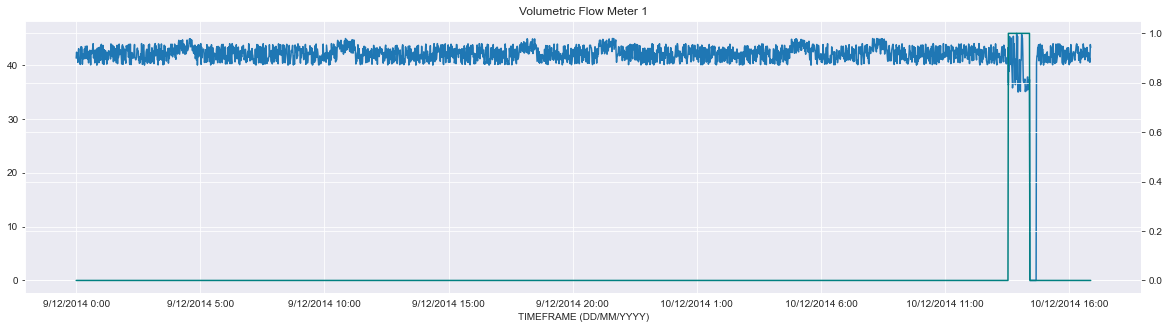

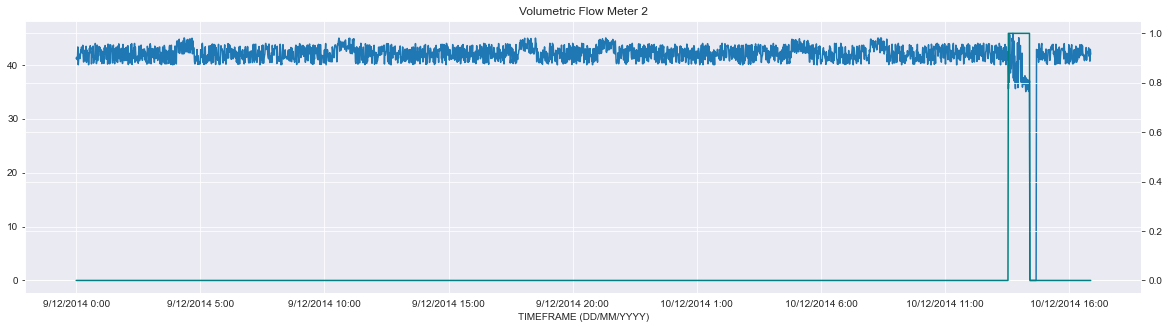

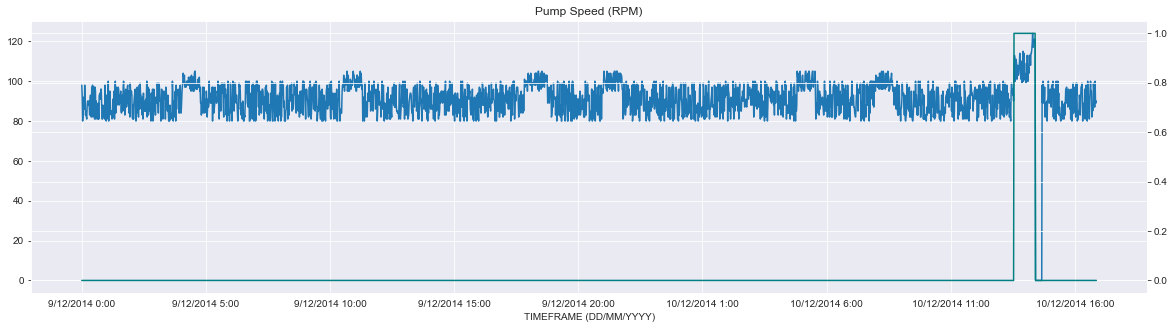

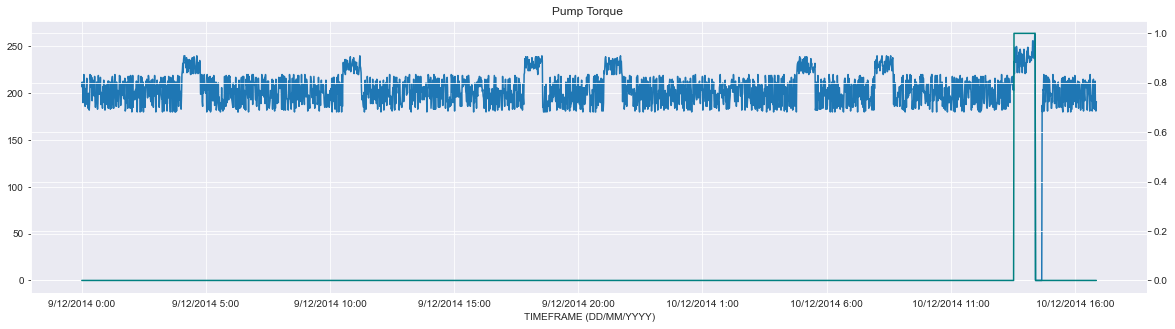

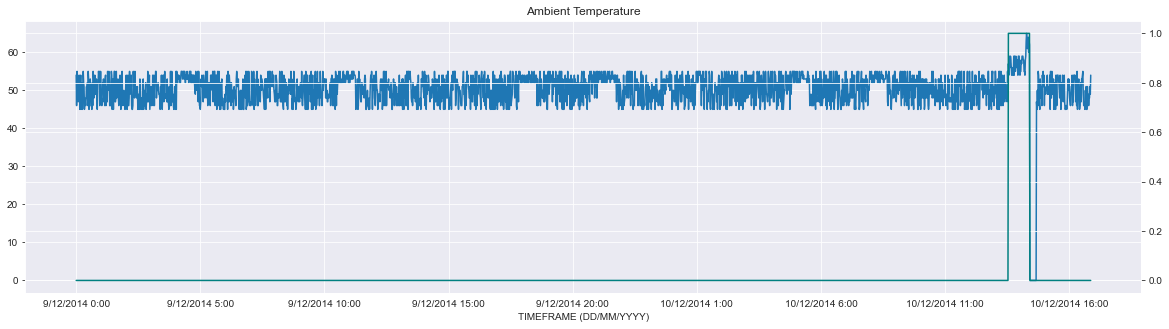

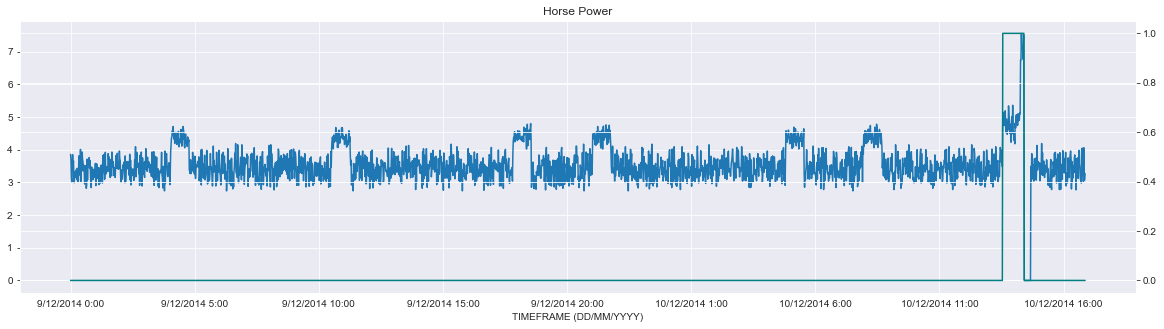

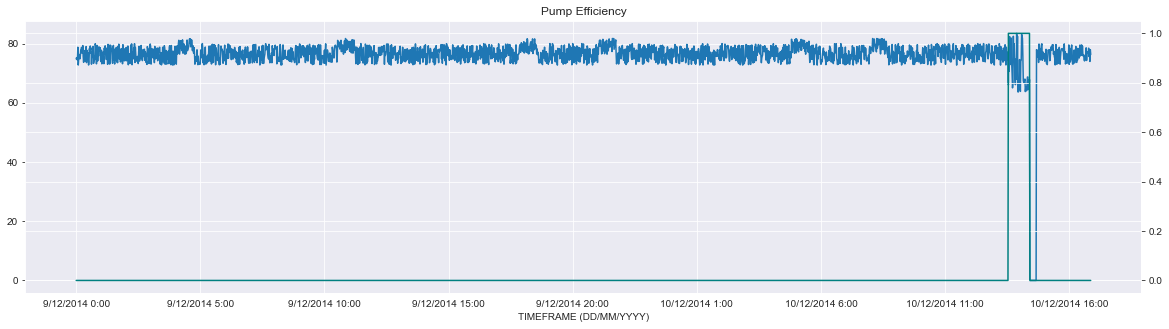

In [67]:
# this for loop works
for i in ListOfVariables:
    first_axis= dataframe_raw_time_idx[i].plot()
    first_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
    second_axis=first_axis.twinx()
    second_axis.plot(dataframe_raw_time_idx['PUMP FAILURE (1 or 0)'], color='teal')
    second_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.title(i)
    plt.show()

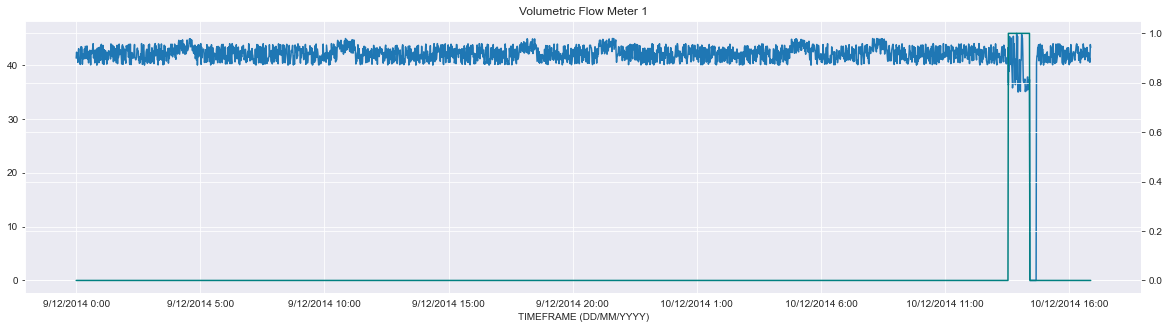

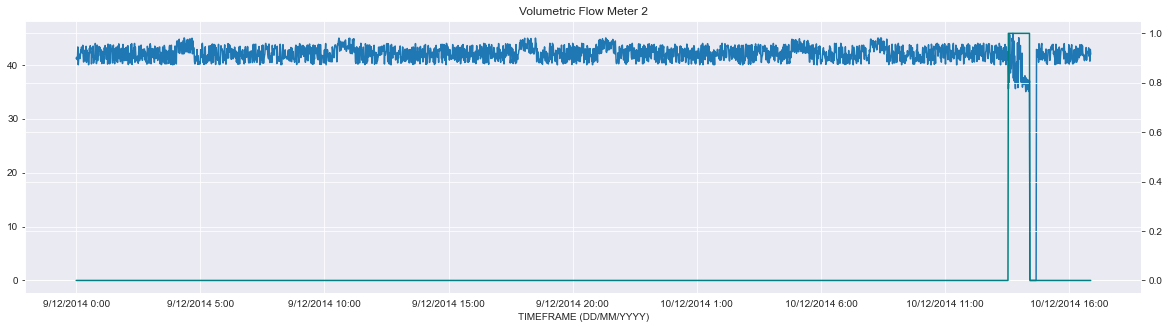

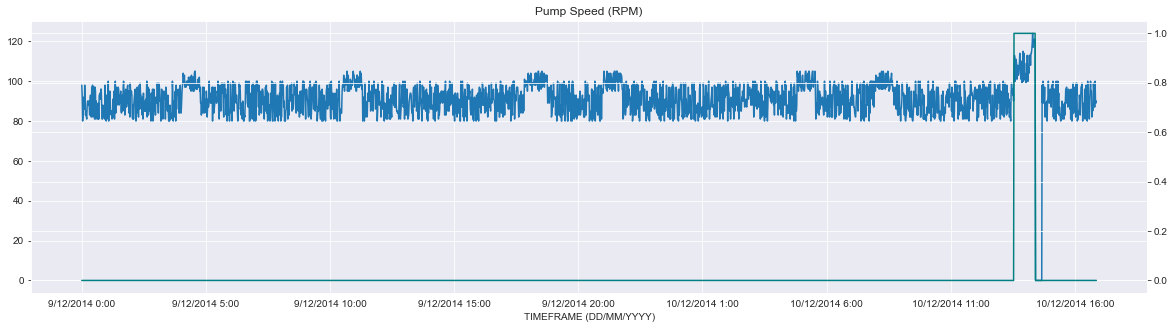

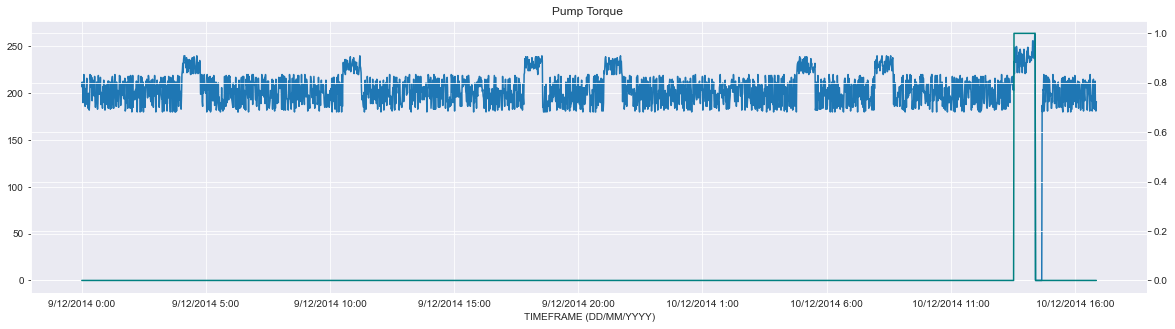

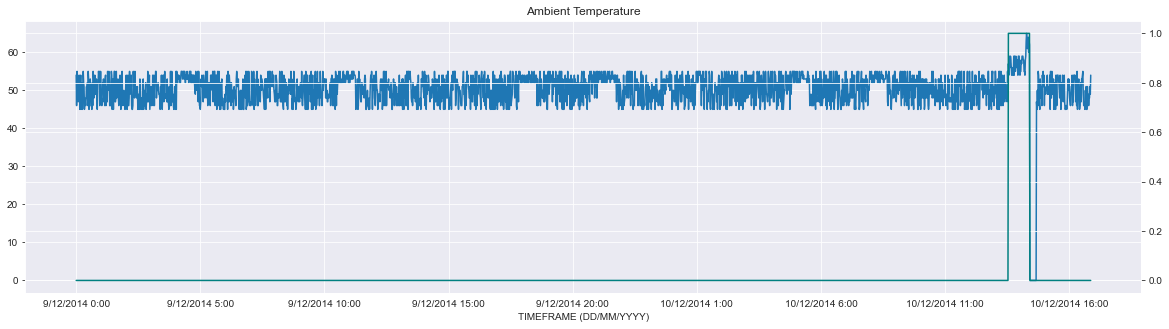

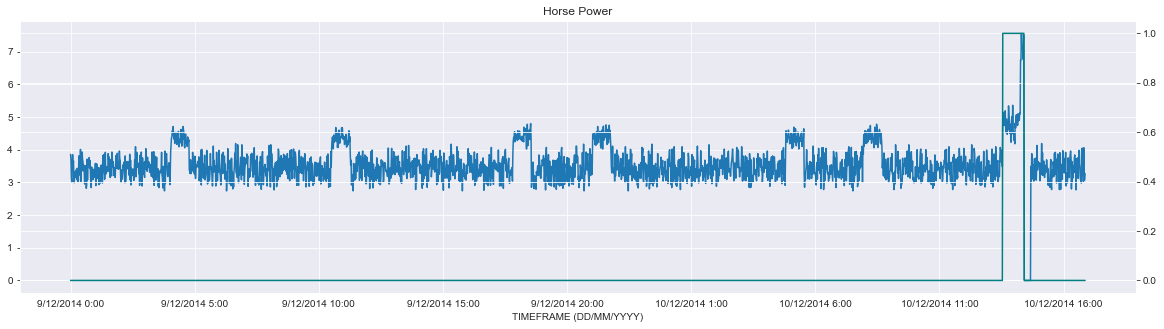

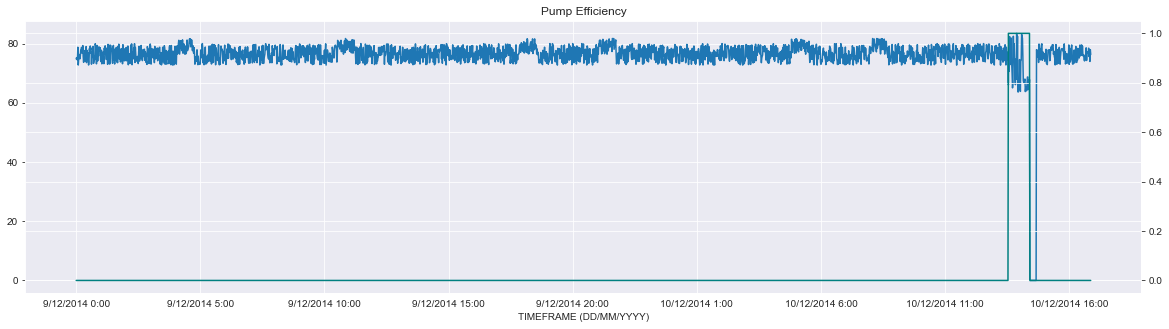

In [180]:
#do not alter, sanity check below

In [ ]:
#do not alter , sanity check below

<b> Have you noticed any particular trends when looking at the data in this way? Has it made it easier to see which variables *might* be reacting more strongly to the Pump Failure than others? </b> 

# Answer
* Horse Power: Most Effected by Pump Failure
* All Other Elements: Notably Effected by Pump Failure

<h3>  <span style="color:green">This is where we will switch to using the dataframe_stdev that you had previously defined in Q1, dataframe_stdev </span> </h3>

---

Now that you've iterated through the dataframe_raw, we're going to do something similar with the dataframe_stdev dataset.

In these next few exercises you'll be seeking to better understand how to make use of Pythons Powerful Inferential Statistics and Plotting libraries to Zoom In on periods of interest that you'd like to examinate further.

First, prepare the DataFrame with the TIMEFRAME (DD/MM/YYYY) column set as the index.

You might ask: What is an Index?

An **index** is used as a unique identifier for each record in the dataset. This is used primarily for JOINING operations (think SQL joins), or in our case, for filtering on a specific time period.

You'll be making use of the following function:

    dataframe.set_index(['someColumn', inplace=True)

For an example of how this works, click <a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html> here </a>:


### Step 9: <span style="color:green">Create a Plot for Pump Failures Over a Rolling Time Period</span> 

i) Set the **index of the dataframe_stdev** dataset to the TIMEFRAME (DD/MM/YYYY) attribute.

ii) Using the List_Of_Variables you created in Step 8, Re-plot all the numerical variables in the dataframe_stdev for the following time periods:
     10/12/2014 12:00 to 10/12/2014 14:30.

Please ensure you set the secondary axes as the Pump Failure Variable so you can observe how the variables move with respect to Pump Failure. 

    for item in ListOfVariables:
        first_axis = dataframe[___].plot #We are looping through every item in the dataframe.
        first_axis.xaxis.set_major_locator(plt.MaxNLocator(10)) #This will ensure we only plot a maximum of 10 Time Stamps
        second_axis = first_axis.twinx() #The Twinx function is used to ensure we share the X-Axis for both plots
        second_axis.plot(dataframe['ColumnOfInterest'], color='orange')
        second_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
        plt.title(item)
        plt.show()

<b>Note: To filter on the time period you will need to make use of the below syntax which *should* be familiar to you as you are subsetting your DataFrame, but instead of on a column, you're subsetting a time period. </b>

    dataframe_time_filtered = dataframe[(dataframe.index >= "_____") & (dataframe.index <= "_____")]


## Please put your code here

<h4> The output from your code should display image(s) like the one shown below </h4>

In [69]:
dataframe_stdev.set_index('TIMEFRAME (DD/MM/YYYY)')

,Data Source,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
TIMEFRAME (DD/MM/YYYY),,,,,,,,,
9/12/2014 0:00,Rolling Stdev (30 Minute),1.04,0.96,5.54,11.70,3.40,0.32,1.74,0
9/12/2014 0:01,Rolling Stdev (30 Minute),1.06,1.01,5.49,11.73,3.36,0.31,1.83,0
9/12/2014 0:02,Rolling Stdev (30 Minute),1.06,1.03,5.62,11.94,3.40,0.31,1.87,0
9/12/2014 0:03,Rolling Stdev (30 Minute),1.06,1.05,5.61,12.10,3.30,0.31,1.90,0
9/12/2014 0:04,Rolling Stdev (30 Minute),1.07,1.03,5.61,12.31,3.36,0.30,1.88,0
...,...,...,...,...,...,...,...,...,...
9/12/2014 0:26,Rolling Stdev (30 Minute),1.36,0.90,4.68,14.10,2.80,0.42,1.63,0
9/12/2014 0:27,Rolling Stdev (30 Minute),1.51,0.82,5.15,13.45,2.55,0.43,1.50,0
9/12/2014 0:28,Rolling Stdev (30 Minute),1.57,0.93,5.35,14.86,2.65,0.47,1.70,0


In [82]:
from datetime import datetime 
dataframe_time_filtered = dataframe_stdev[(dataframe_stdev['TIMEFRAME (DD/MM/YYYY)'] >= "10/12/2014 12:00") & (dataframe_stdev['TIMEFRAME (DD/MM/YYYY)'] <= "10/12/2014 14:30")]

In [83]:
dataframe_time_filtered

,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
2160,Rolling Stdev (30 Minute),10/12/2014 12:00,1.10,1.13,6.21,13.74,3.30,0.31,2.05,0
2161,Rolling Stdev (30 Minute),10/12/2014 12:01,1.13,1.13,6.29,13.51,3.30,0.31,2.05,0
2162,Rolling Stdev (30 Minute),10/12/2014 12:02,1.13,1.14,6.21,13.68,3.36,0.31,2.07,0
2163,Rolling Stdev (30 Minute),10/12/2014 12:03,1.13,1.16,6.30,13.59,3.29,0.32,2.10,0
2164,Rolling Stdev (30 Minute),10/12/2014 12:04,1.13,1.20,6.47,13.19,3.21,0.31,2.17,0
...,...,...,...,...,...,...,...,...,...,...
2306,Rolling Stdev (30 Minute),10/12/2014 14:26,21.39,21.53,46.10,101.84,25.21,1.75,39.14,0
2307,Rolling Stdev (30 Minute),10/12/2014 14:27,21.38,21.44,46.34,102.22,25.28,1.78,38.99,0
2308,Rolling Stdev (30 Minute),10/12/2014 14:28,21.24,21.31,46.09,101.28,25.29,1.76,38.74,0
2309,Rolling Stdev (30 Minute),10/12/2014 14:29,20.94,21.04,45.52,100.59,25.03,1.75,38.25,0


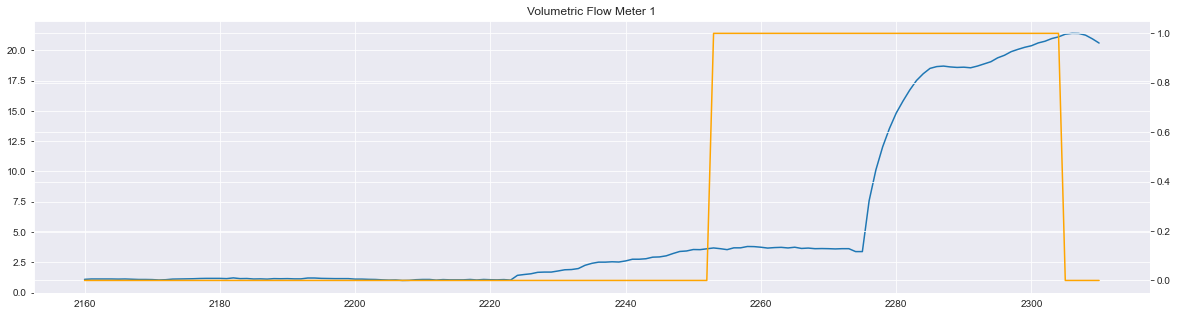

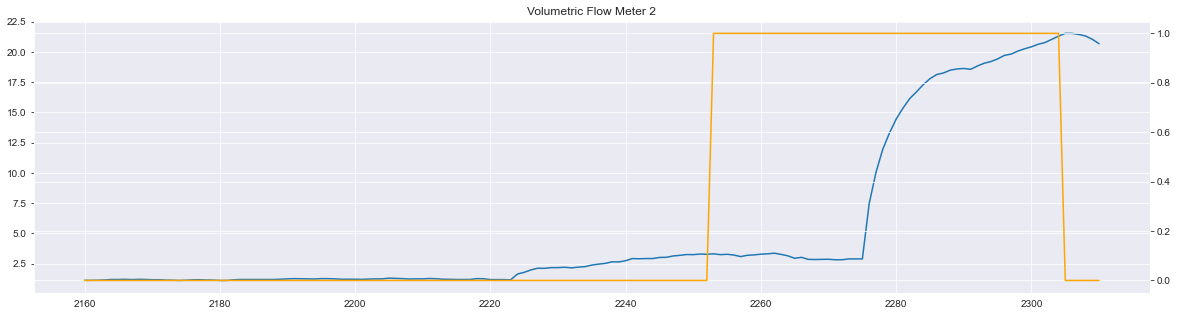

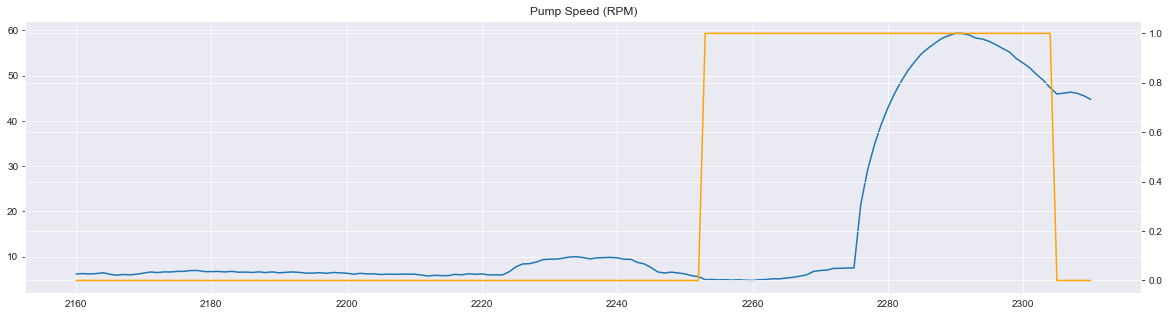

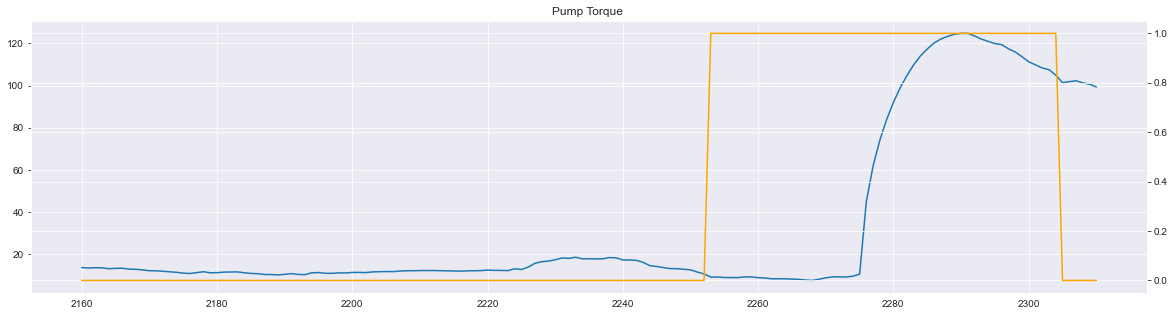

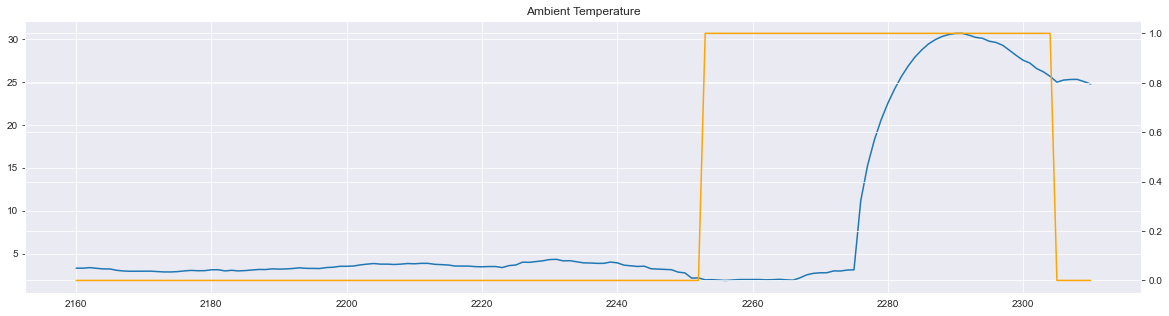

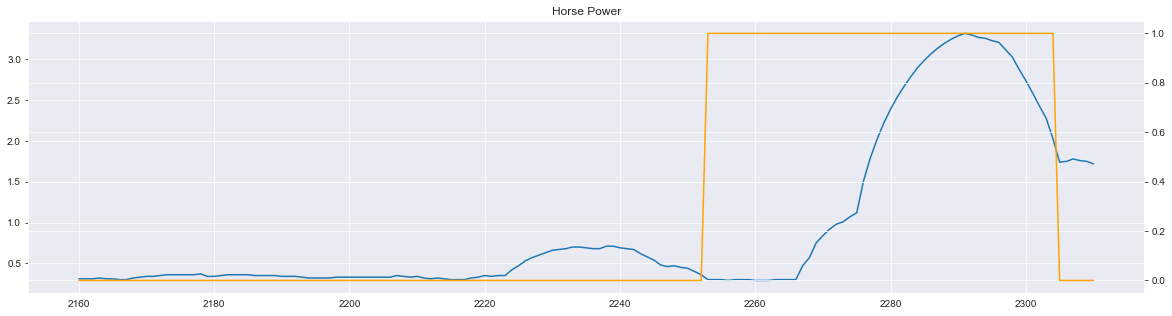

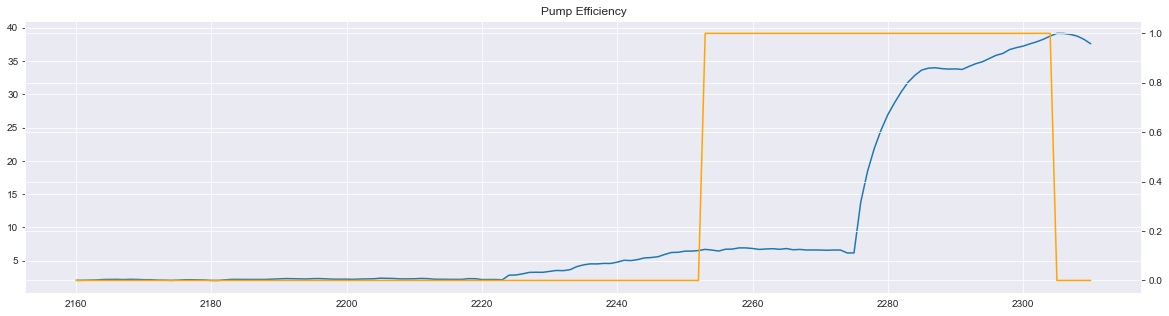

In [84]:
# this for loop works
for i in ListOfVariables:
    first_axis= dataframe_time_filtered[i].plot()
    first_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
    second_axis=first_axis.twinx()
    second_axis.plot(dataframe_time_filtered['PUMP FAILURE (1 or 0)'], color='orange')
    second_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.title(i)
    plt.show()

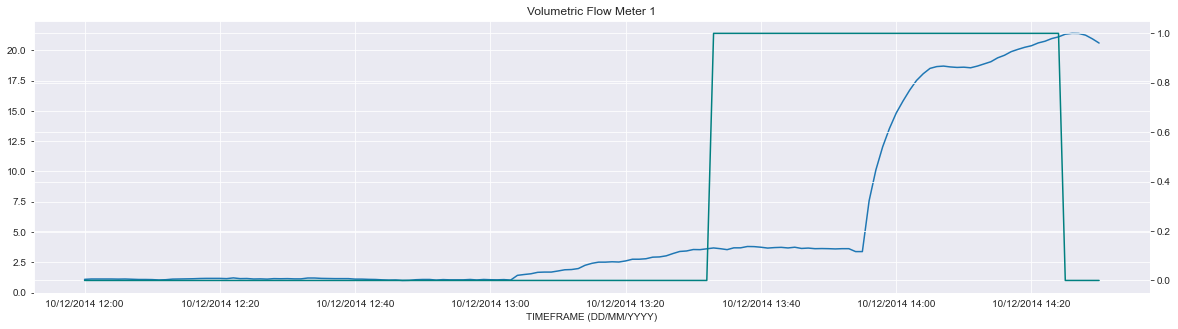

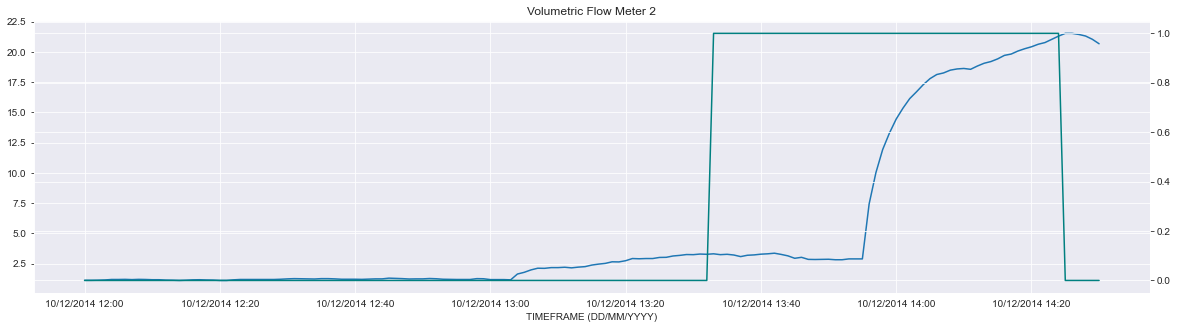

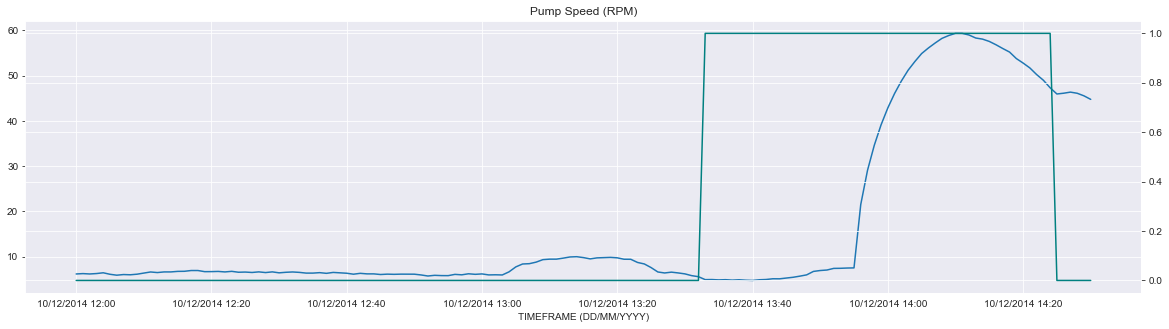

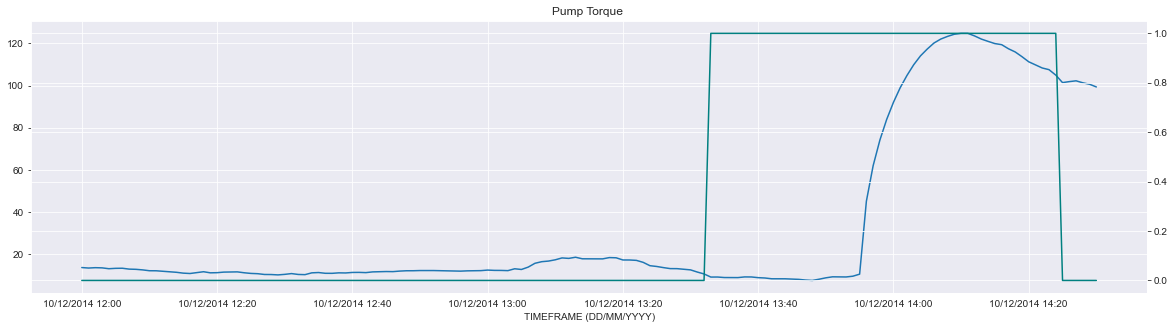

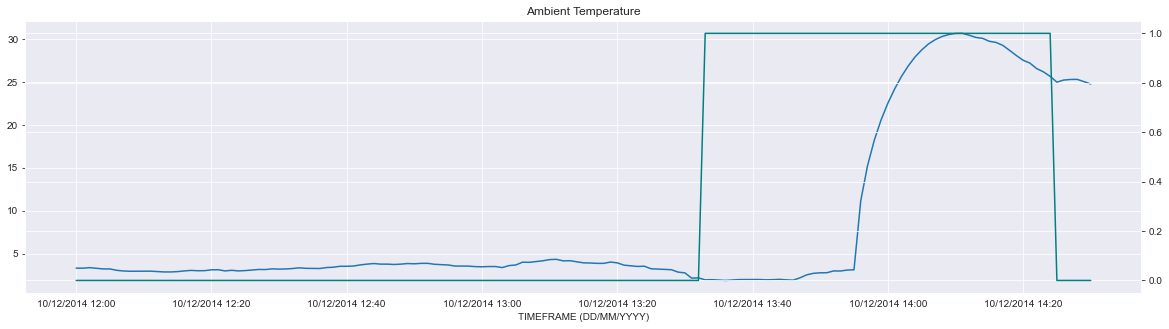

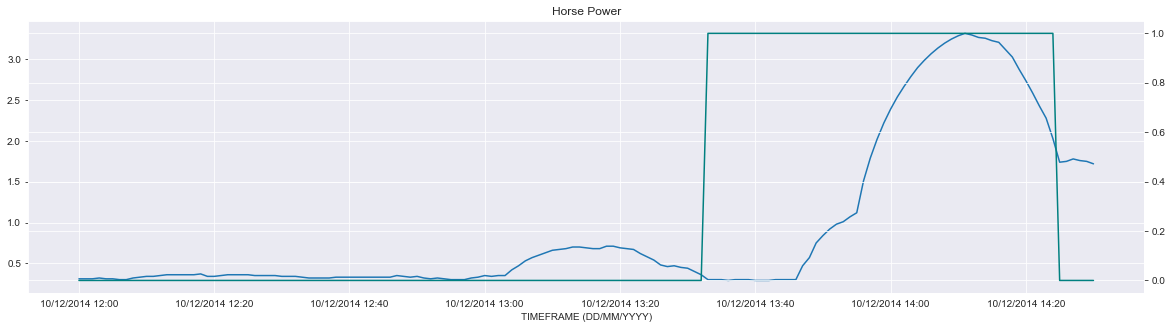

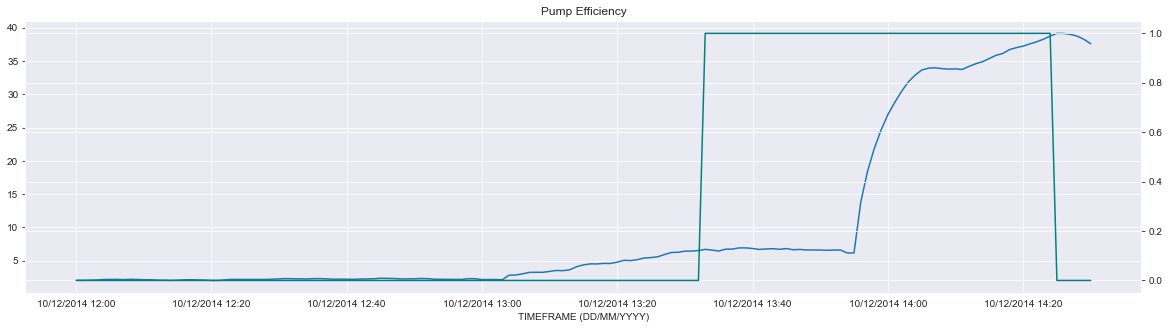

In [78]:
#do not alter this line. Sanity Check

---

## Part II: <span style="color:blue">Inferential Statistical Analysis</span>

When you performed inferential statistics for Southern Water Corp using Excel, you made use of the data analysis package to create a heatmap using the correlation function. The heatmap showed the attributes that strongly correlated to Pump Failure. 

Now, you'll create a heatmap using Seaborn's heatmap function — another testament to the fact that having Matplotlib and Seaborn in your toolbox will allow you to quickly create beautiful graphics that provide key insights. 

### Step 10: <span style="color:purple">Create a Heatmap</span> 
i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (R) for all variables using the dataframe_raw dataset.

The syntax of Seaborn takes the following arguments:

<a href = https://seaborn.pydata.org/generated/seaborn.heatmap.html> sns.heatmap(correlated_dataframe, annot=True) </a>

You'll need to ensure you use the following <a href = https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html>.corr() </a>  function and apply this to your dataframe first, <b> before </b> passing this to the sns.heatmap() function.

## Please put your code here

#### We've included an example of what the output *may* look like below

,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
0,Rolling Stdev (30 Minute),9/12/2014 0:00,1.04,0.96,5.54,11.70,3.40,0.32,1.74,0
1,Rolling Stdev (30 Minute),9/12/2014 0:01,1.06,1.01,5.49,11.73,3.36,0.31,1.83,0
2,Rolling Stdev (30 Minute),9/12/2014 0:02,1.06,1.03,5.62,11.94,3.40,0.31,1.87,0
3,Rolling Stdev (30 Minute),9/12/2014 0:03,1.06,1.05,5.61,12.10,3.30,0.31,1.90,0
4,Rolling Stdev (30 Minute),9/12/2014 0:04,1.07,1.03,5.61,12.31,3.36,0.30,1.88,0
...,...,...,...,...,...,...,...,...,...,...
2447,Rolling Stdev (30 Minute),9/12/2014 0:26,1.36,0.90,4.68,14.10,2.80,0.42,1.63,0
2448,Rolling Stdev (30 Minute),9/12/2014 0:27,1.51,0.82,5.15,13.45,2.55,0.43,1.50,0
2449,Rolling Stdev (30 Minute),9/12/2014 0:28,1.57,0.93,5.35,14.86,2.65,0.47,1.70,0
2450,Rolling Stdev (30 Minute),9/12/2014 0:29,1.76,1.10,0.58,5.51,2.52,0.11,2.00,0


In [86]:
dataframe_raw

,Data Source,TIMEFRAME (DD/MM/YYYY),Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
0,Raw,9/12/2014 0:00,41.30,41.16,98,207,54,3.86,74.84,0
1,Raw,9/12/2014 0:01,42.40,41.39,92,212,46,3.71,75.25,0
2,Raw,9/12/2014 0:02,41.43,41.15,80,207,55,3.15,74.82,0
3,Raw,9/12/2014 0:03,42.21,40.93,83,190,49,3.00,74.42,0
4,Raw,9/12/2014 0:04,40.51,43.32,90,195,50,3.34,78.76,0
...,...,...,...,...,...,...,...,...,...,...
2448,Raw,10/12/2014 16:48,40.75,41.61,87,183,48,3.03,75.65,0
2449,Raw,10/12/2014 16:49,41.32,42.34,100,213,48,4.06,76.98,0
2450,Raw,10/12/2014 16:50,40.53,40.68,89,182,51,3.08,73.96,0
2451,Raw,10/12/2014 16:51,43.82,42.87,89,181,49,3.07,77.95,0


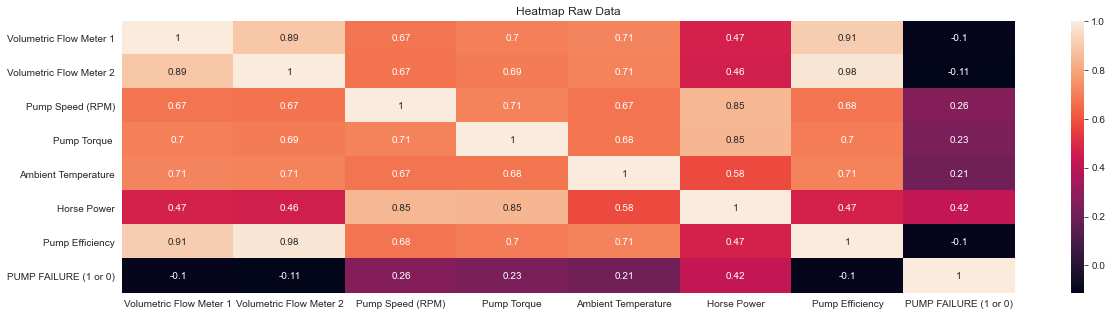

In [87]:
correlated_dataframe = dataframe_raw.corr()
sns.heatmap(correlated_dataframe, annot=True)
plt.title('Heatmap Raw Data')
plt.show()

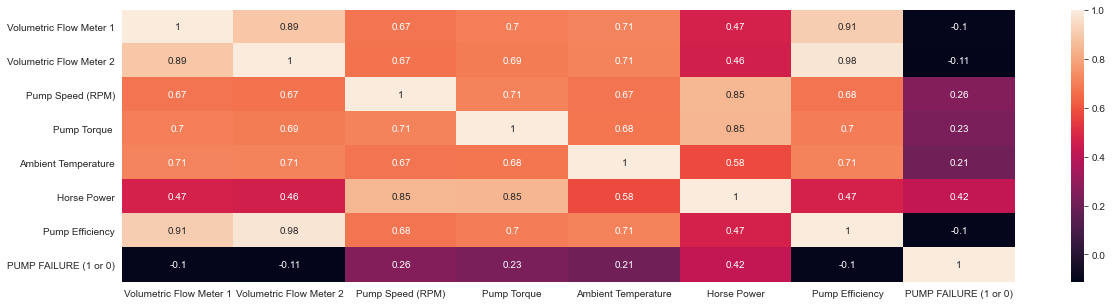

In [181]:
# do not alter this line, sanity check

In [ ]:
# do not alter this line, sanity check

**Which variables seem to correlate with Pump Failure?**


# Answer

When observing the PUMP FAILURE (1 or 0) row from the heatmap, **Horse Power** holds the highest R squared value of 0.42


### Step 11: <span style="color:purple">Create a Barplot of Correlated Features</span>
<b> i) Using the correlated DataFrame you created earlier, create a barplot that shows the correlated features against PUMP FAILURE (1 or 0), in descending order. </b>

You'll have to think carefully regarding this question.

You'd know that you can get the correlation values from the following command:

    dataframe.corr()
    
Upon printing this out, you should get a **DataFrame** that looks like the below:


In [80]:
# do not alter this line, sanity check

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
Volumetric Flow Meter 1,1.000000,0.893058,0.674691,0.700425,0.713913,0.470081,0.913014,-0.102508
Volumetric Flow Meter 2,0.893058,1.000000,0.671896,0.692183,0.710423,0.462087,0.980144,-0.112115
Pump Speed (RPM),0.674691,0.671896,1.000000,0.711037,0.674645,0.848416,0.677924,0.260016
Pump Torque,0.700425,0.692183,0.711037,1.000000,0.680159,0.847884,0.698527,0.233193
Ambient Temperature,0.713913,0.710423,0.674645,0.680159,1.000000,0.579374,0.712727,0.207946
Horse Power,0.470081,0.462087,0.848416,0.847884,0.579374,1.000000,0.471731,0.421694
Pump Efficiency,0.913014,0.980144,0.677924,0.698527,0.712727,0.471731,1.000000,-0.102696
PUMP FAILURE (1 or 0),-0.102508,-0.112115,0.260016,0.233193,0.207946,0.421694,-0.102696,1.000000


In [ ]:
# do not alter this line, sanity check

You might think to yourself this looks **suspiciously like a DataFrame with columns that you can manipulate**.

You can.

With this hint in mind, you should be able to **select the relevant column of interest and combine this with the .plot(kind='__') function to answer the question**. Don't forget to think about .sort_values() to help sort your data!

### Please put your code here

<AxesSubplot:>

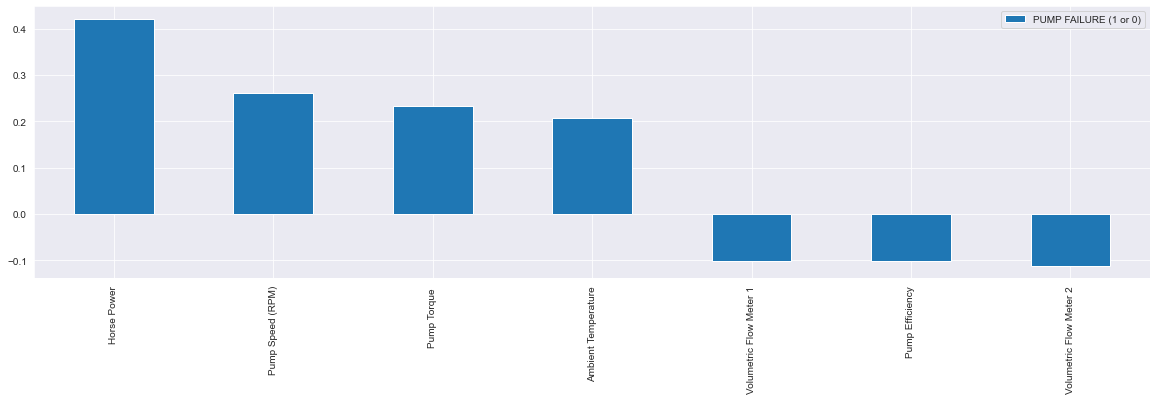

In [107]:
pump_failure_id = correlated_dataframe[['PUMP FAILURE (1 or 0)']]
pump_failure_id.sort_values(by='PUMP FAILURE (1 or 0)', ascending=False)[1:].plot(kind='bar')

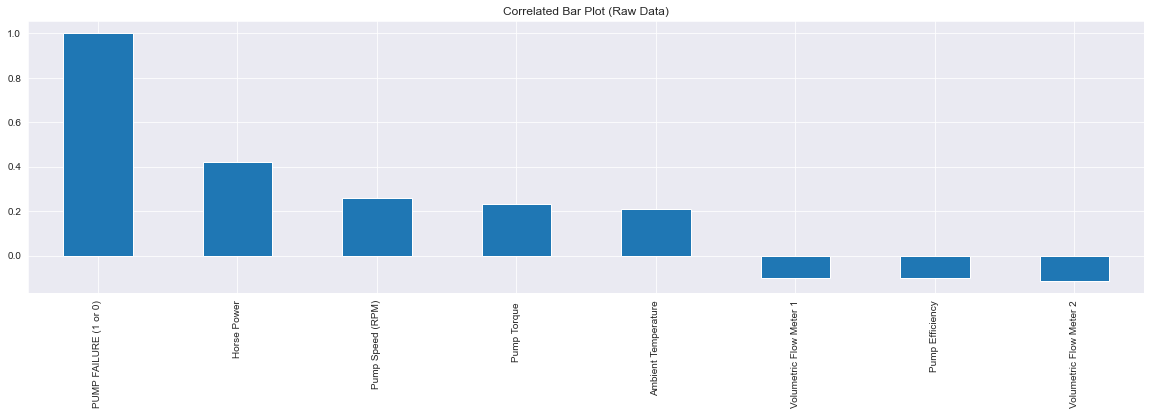

In [184]:
# do not alter line, sanity check

In [ ]:
# do not alter line, sanity check

---

### Step 12: <span style="color:purple">Create a Rolling Standard Deviation Heatmap</span> 
Previously, you created a correlation matrix using 'raw' variables. We saw *some* correlations with the raw data but they weren't necessarily as strong as we would have liked. This time, we'll recreate a Heatmap using the dataframe_stdev dataset you had imported in Step Two. 

<b> i) Using Seaborn's heatmap function, create a heatmap that clearly shows the correlations (including R) for all variables using the dataframe_stdev dataset. </b>


## Please put your code here

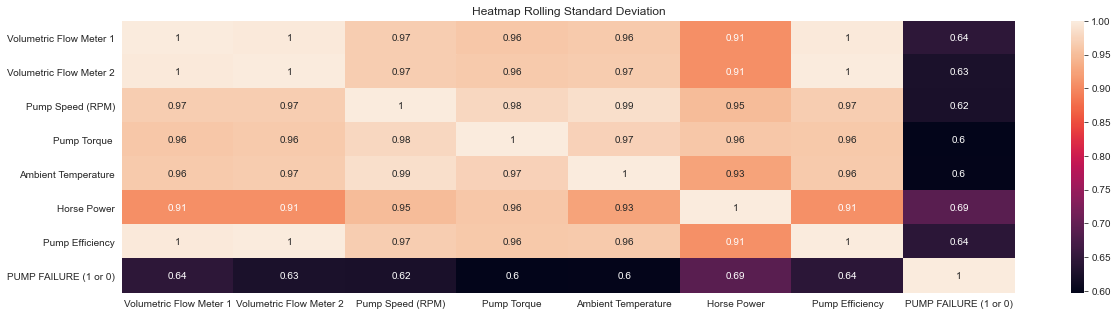

In [92]:
correlated_stdev = dataframe_stdev.corr()
sns.heatmap(correlated_stdev, annot=True)
plt.title('Heatmap Rolling Standard Deviation')
plt.show()

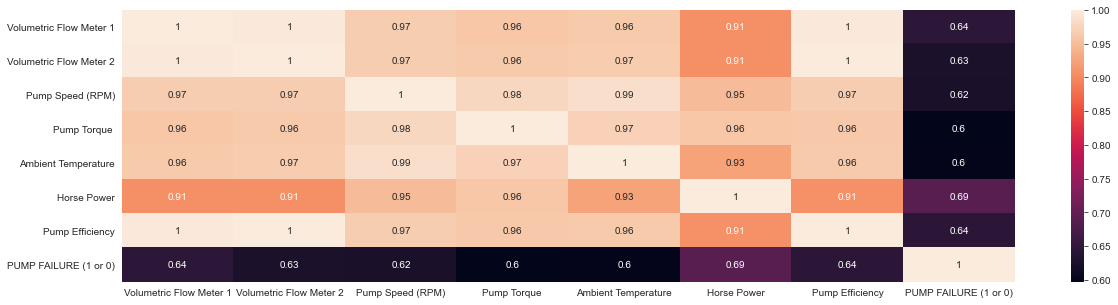

In [185]:
# do not alter line, sanity check

In [ ]:
# do not alter line, sanity check

<b> Do any variables stand out? If yes, list these out below your heatmap. </b>

# Answer

When observing the PUMP FAILURE (1 or 0) row from the stdev heatmap, **Horse Power** again holds the highest R squared value of 0.69. Additionally, all R squared values outside of this row are close to 1.

### Creating a Multivariate Regression Model


When you worked on this case study in Excel, you went through the tricky process of using the rolling standard deviation variables to generate a regression equation. Happily, this process is much simpler in Python.  

For this step, you'll be using the statsmodel.api library you imported earlier and calling the Ordinary Least Squares Regression to create a multivariate regression model (which is a linear regression model with more than one independent variable).

### Step 13: <span style="color:purple">Use OLS Regression</span> 
<b> i) Using the OLS Regression Model in the statsmodel.api library, create a regression equation that models the Pump Failure (Y-Variable) against all your independent variables in the dataframe_raw dataset. </b>

In order to fit a linear regression model with statsmodels.api there are a few steps that need to be taken. We have demonstrated this below:

<b> Don't forget to reimport the DataFrames you've previously imported in Step 2 before starting these steps </b> 

    1. Establish two DataFrames named, independent_variables and dependent_variables. The independent variables are known as explanatory variables - they help EXPLAIN what you are trying to model. Dependent Variable on the other hand is the variable of interest that you want to MODEL. In this case, the Dependent Variable is Pump Failure (1 or 0).
    
    2. Add a constant to your Independent Dataframe via the following syntax:
    independent_variables = sm.add_constant(independent_variables). This will simply add a constant stream of 1's in a column to your dataframe. This constant is used to account for bias in the model.  
    
    3. Store and Fit your model with the below syntax:
    regression_model = sm.OLS(dependent_variable,independent_variable).fit() 
    
    4. Print the regression_model.summary() to view the Regression Statistics 


<b> ii) Repeat i) but this time use the dataframe_stdev you imported previously.</b>

You will repeat the same steps as you have done in i) only you will be changing the dataset from dataset_raw to dataset_stdev. 


## Please put your code here 

In [ ]:
#Dataframe_Raw

In [ ]:
#Dataframe_Stdev

In [95]:
dataframe_raw = pd.read_csv('P1_DF_Raw_Data.csv')
dataframe_stdev = pd.read_csv('P1_DF_Rolling_Stdev.csv')

In [97]:
independent_variables = dataframe_raw[['Volumetric Flow Meter 1','Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ',
       'Ambient Temperature', 'Horse Power', 'Pump Efficiency']]

dependent_variable = dataframe_raw[['PUMP FAILURE (1 or 0)']]

independent_variables = sm.add_constant(independent_variables)

regression_model = sm.OLS(dependent_variable,independent_variables).fit() 

regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Mon, 22 Nov 2021   Prob (F-statistic):          5.58e-233
Time:                           18:21:39   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1138      0.028      4.058      0.000       0.059       0.169
Volumetric Flow Meter 1    -0.0145      0.002     -7.974      0.000      -0.018      -0.011
Volumetric Flow Meter 2    -0.0184      0.003     -5.497      0.000      -0.025      -0.012
Pump Speed (RPM)            0.0021      0.001      2.589      0.010       0.001       0.004
Pump Torque                 0.0007      0.000      1.801      0.072   -6.24e-05       0.001
Ambient Temperature         0.0099      0.001     14.159      0.000       0.009       0.011
Horse Power                 0.0827      0.019      4.373      0.000       0.046       0.120
Pump Efficiency             0.0020      0.002      1.028      0.304      -0.002       0.006
==============================================================================
Omnibus:                     2071.669   Durbin-Watson:                   0.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58977.621
Skew:                           3.929   Prob(JB):                         0.00
Kurtosis:                      25.700   Cond. No.                     3.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
dataframe_stdev = pd.read_csv('P1_DF_Rolling_Stdev.csv')

In [102]:
std_independent_variables = dataframe_stdev[['Volumetric Flow Meter 1','Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ',
       'Ambient Temperature', 'Horse Power', 'Pump Efficiency']]

std_dependent_variable = dataframe_stdev[['PUMP FAILURE (1 or 0)']]

std_independent_variables = sm.add_constant(std_independent_variables)

std_regression_model = sm.OLS(std_dependent_variable,std_independent_variables).fit() 

std_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Mon, 22 Nov 2021   Prob (F-statistic):               0.00
Time:                           18:29:34   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0354      0.004    -10.045      0.000      -0.042      -0.029
Volumetric Flow Meter 1     0.0513      0.010      5.109      0.000       0.032       0.071
Volumetric Flow Meter 2    -0.6085      0.020    -30.450      0.000      -0.648      -0.569
Pump Speed (RPM)           -0.0178      0.002     -9.057      0.000      -0.022      -0.014
Pump Torque                -0.0189      0.001    -22.511      0.000      -0.020      -0.017
Ambient Temperature         0.0178      0.003      5.773      0.000       0.012       0.024
Horse Power                 0.7636      0.022     35.045      0.000       0.721       0.806
Pump Efficiency             0.3407      0.012     28.118      0.000       0.317       0.364
==============================================================================
Omnibus:                     1432.369   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72092.923
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      29.245   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h4> <b> Compare the Models you've created and observe the R Squared displayed for each model. Which model seems better and why? Put your thoughts down below.  </b> If you're not sure how to answer this, you should reference the resource <a href = https://blog.minitab.com/en/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit> here </a> for a more detailed explanation.



# Answer
**R Squared values**
* Raw Data R Squared : 0.362
* Standard Deviation Data R Squared : 0.778

The **Standard Deviation Dataset** is a better fit, because the absolute value of R Squared is closer to 1 than the Raw Dataset.

The **Standard Deviation Dataset** is less spread out, meaning there is less variablity. this means the linear model is better.

### Step 14: <span style="color:purple">Analysis of Coefficients </span>

Great job creating those regressive equations! You've reached the final two steps of this case study!

You've identified that *one* regressive model has a better fit than the previous model.

Using this model, we want to **extract** the co-efficients to better understand the variables that display the largest *absolute* rate of change with respect to Pump Failure. We'll use the co-efficients to better assess this from an *absolute* rate of change perspective. (i.e. Which variables spike the most in relation to Pump Failure?)

<b> i) Using the .params method, extract the Coefficients from your regression_model and create a bar plot that identifies which coefficients react most strongly with respect to Pump Failure. Which three (3) variables seem to showcase the
strongest 'relationship' with respect to Pump Failure? </b>

You can use params via the following syntax:

    model.params where model represents the name of the regression model you've created.

We've included an example below that showcases what your chart should look like upon completion of this exercise. 



## Please put your code here

<AxesSubplot:>

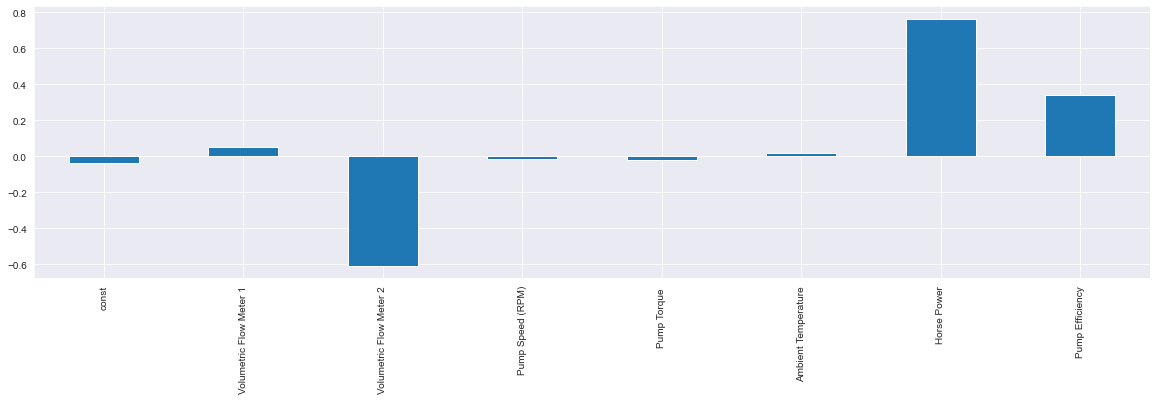

In [103]:
std_regression_model.params.plot(kind='bar')

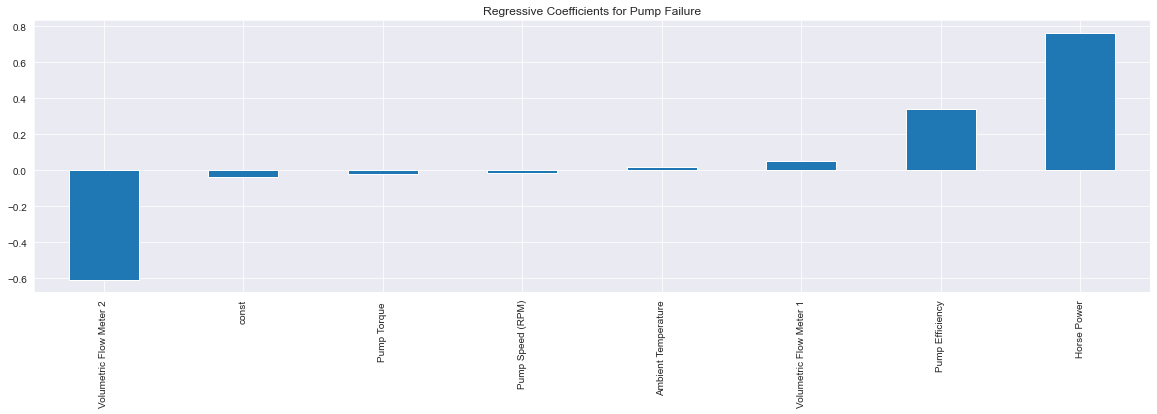

In [92]:
# do not alter this line, sanity check

In [ ]:
# do not alter this line, sanity check

In [ ]:
dataframe_stdev['Prediction'] = std_regression_model.predict(std_independent_variables)
Axes1 = ['Volumetric Flow Meter 2','Horse Power', 'Pump Efficiency']
Axes2 = ['PUMP FAILURE (1 or 0)','Prediction']
ax1 = dataframe_stdev[Axes1].plot()
ax2 = ax1.twinx()
ax2.plot(dataframe_stdev[Axes2], color='Black', label='PUMP FAILURE')
plt.tight_layout()
plt.title('Regressive equation plot')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show

In [ ]:
std_independent_variables = dataframe_stdev[['Volumetric Flow Meter 1','Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ',
       'Ambient Temperature', 'Horse Power', 'Pump Efficiency']]

std_dependent_variable = dataframe_stdev[['PUMP FAILURE (1 or 0)']]

std_independent_variables = sm.add_constant(std_independent_variables)

std_regression_model = sm.OLS(std_dependent_variable,std_independent_variables).fit() 

std_regression_model.summary()

<h3> <span style="color:orange"> Please note that Step 15 is a Challenge Questions and will intentionally be more difficult </h3> 


### Step 15: <span style="color:purple">Validate Predictions</span> 

Now it's time for us to <b> validate our predictions. </b>
    
Once you've created a regressive_model, you can call this using the following syntax:

        regressive_model.predict(independent_variables). 
        
Extra information regarding how this works can be found <a href = https://www.statsmodels.org/stable/examples/notebooks/generated/predict.html> here </a>

<b> 
i) Create a new column in the dataframe_stdev, called, 'Prediction'. 
    
ii) Use the regression equation you created in the previous step and apply the .predict() function to the independent variables in the dataframe_stdev dataset so you get a column full of your regressive predictions.
    
iii) Create a Dual-Axis Plot with the following axes items: <p>
    
        Axes One would contain: Volumetric Flow Meter 2, Pump Efficiency and Horse Power 
        Axes two would contain: Pump Failure (1 or 0) and Prediction
</b>


**Note:** Don't forget how to use .twinx() to help you out with the dual axis!

We've included an example below of how your chart might look once you're done!

## Please put your code here

In [ ]:
# WHAT YOU ARE LOOKING AT ON AXES1 ARE THE VARIABLES THAT CONTAIN
#THE HIGHEST R VALUES CAPTURED IN THE OLS MODEL

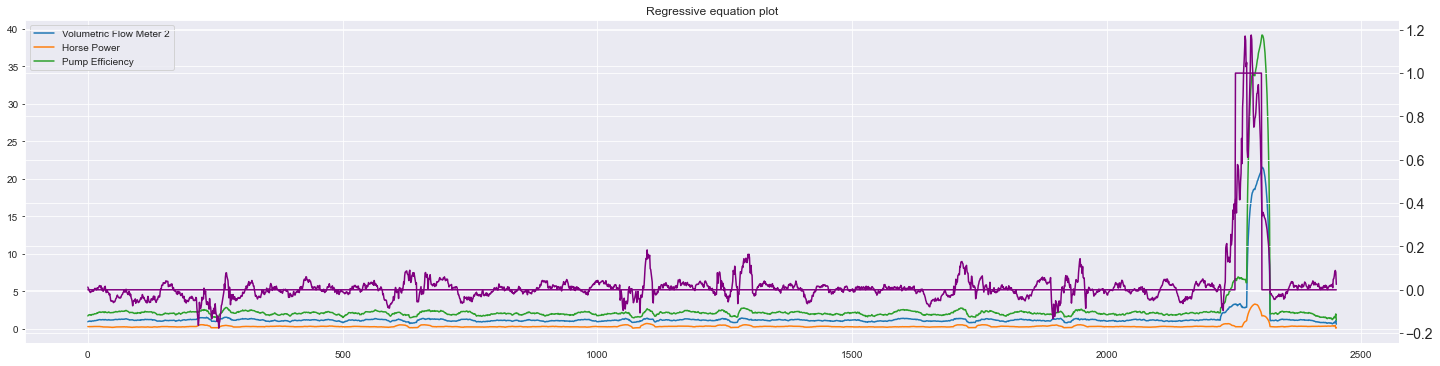

In [106]:
dataframe_stdev['Prediction'] = std_regression_model.predict(std_independent_variables)
Axes1 = ['Volumetric Flow Meter 2','Horse Power', 'Pump Efficiency']
Axes2 = ['PUMP FAILURE (1 or 0)','Prediction']
ax1 = dataframe_stdev[Axes1].plot()
ax2 = ax1.twinx()
ax2.plot(dataframe_stdev[Axes2], color='Purple', label='PUMP FAILURE')
plt.tight_layout()
plt.title('Regressive equation plot')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

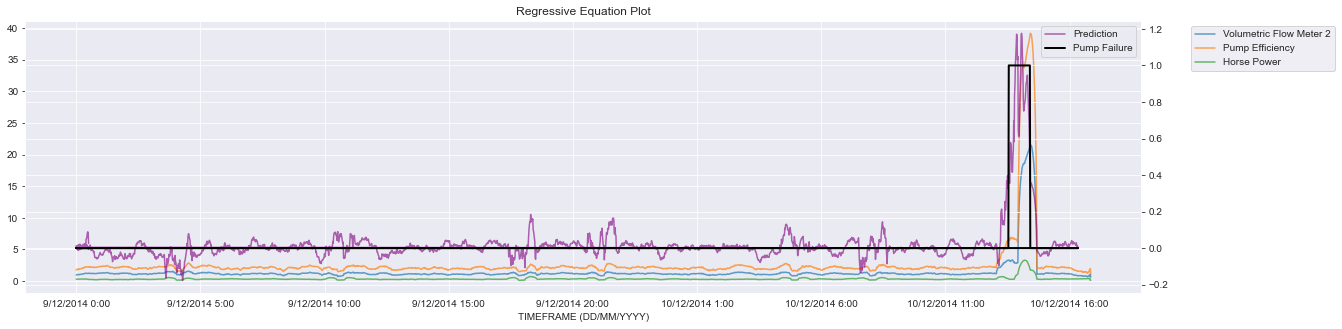

In [162]:
# do not alter this line, sanity check

In [ ]:
# do not alter this line, sanity check

<h3> You've made it to the end of this challenging case study — well done! </h3>

You've learnt to perform a number of new opeartions in Python.

You're now able to:

<li> Create Line Plots and Box Plots </li>
<li> Understand Descriptive Statistics from the .describe() functions </li>
<li> Detect and Remove Outliers from your Dataset </li>
<li> Subset and Filter your DataFrames </li>
<li> Use For Loops to smartly loop through data </li>
<li> Use Dual Axes to Plot Multiple Variables on different axes </li>
<li> Interpret Correlation Coefficients and Heatmaps </li>
<li> Create and assess the goodness of fit for your Linear Regression Models </li>

Well done! This is just the start of your foundation in Python as you grow more proficient in practicing against datasets both big and small.

Keep up the fantastic work and as always - if you have any questions, don't hesitate to reach out to the community, your mentor, or #slack channel for extra support!

<h3> Keep up the amazing work! </h3>
